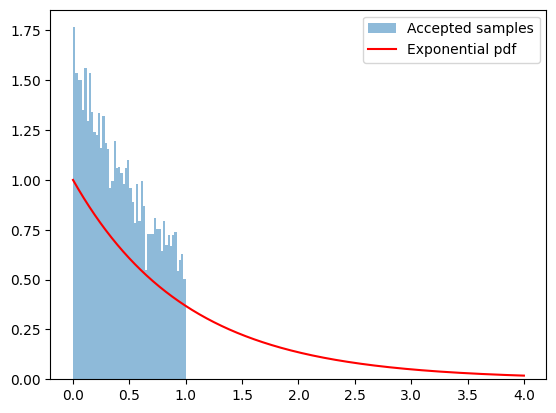

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_pdf(x, lambd=1.0):
    """Probability density function of exponential distribution."""
    return lambd * np.exp(-lambd * x)

def uniform_proposal(x, lambd=1.0):
    """Proposal distribution: uniform."""
    return np.ones_like(x) / (1.0 / lambd)

# Set the seed for reproducibility
np.random.seed(0)

N = 10000  # number of samples to generate
lambd = 1.0  # parameter for the exponential distribution

# Step 1: Generate samples from the proposal distribution (uniform)
x = np.random.uniform(0, 1/lambd, N)

# Step 2: Generate uniform random numbers for comparison
u = np.random.uniform(0, uniform_proposal(x, lambd), N)

# Step 3: Acceptance-rejection step
accepted = u <= exponential_pdf(x, lambd)
samples = x[accepted]

# Plot the histogram of accepted samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Accepted samples')

# Plot the true exponential distribution
x = np.linspace(0, 4/lambd, 1000)
plt.plot(x, exponential_pdf(x, lambd), 'r', label='Exponential pdf')

plt.legend()
plt.show()

In [82]:
class LCG:
    def __init__ (self, a, c,m, seed=None):
        self.a = a
        self.c = c
        self.m = m
        self.x0= seed
        self.x = a*self.x0 + c% m
    
    def prng(self):
        self.x = (self.a*self.x + self.c) % self.m
        return self.x/self.m

rng= LCG(1664525, 1013904223, 2**32-1,112)


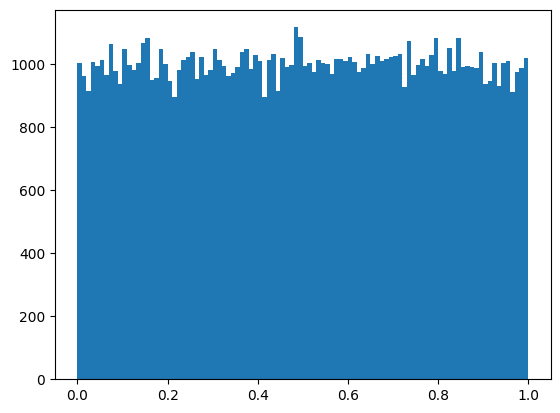

In [83]:
import matplotlib.pyplot as plt 

plt.hist([rng.prng() for i in range(100000)], bins=100)
plt.show()

In [87]:
from scipy.stats import chisquare

# Generate random numbers
random_numbers = [rng.prng() for i in range(10000000)]

# Create histogram
counts, bins = np.histogram(random_numbers, bins=100)

# Perform Chi-Square test
chi2, p = chisquare(counts)

print(f"Chi2 statistic: {chi2}")
print(f"p-value: {p}")

Chi2 statistic: 12965.34022
p-value: 0.0


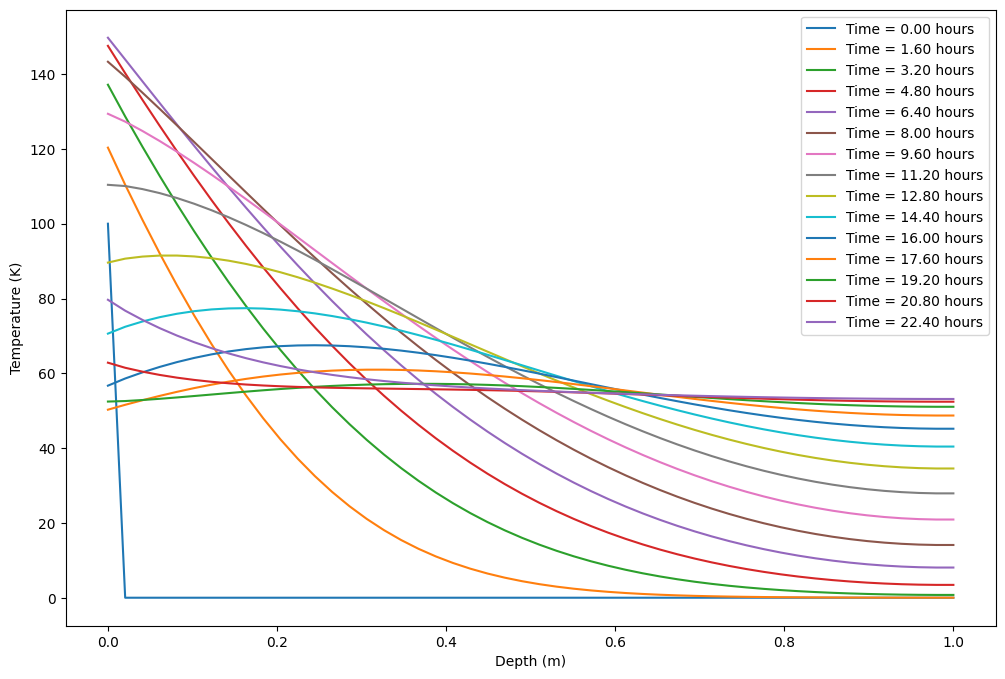

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.01  # thermal diffusivity
L = 1.0  # thickness of the regolith
T0 = 100  # mean surface temperature
A = 50  # amplitude of surface temperature oscillations
P = 24.0  # period of surface temperature oscillations
Nx = 50  # number of spatial points in the grid
Nt = 1500  # number of time steps
dx = L / (Nx - 1)  # spatial grid size
dt = P / Nt  # time step size

# Initialize the temperature array
T = np.zeros(Nx)

plt.figure(figsize=(12, 8))

# Time evolution
for j in range(Nt):
    # Update interior points
    for i in range(1, Nx - 1):
        T[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    
    # Update surface point with sinusoidal forcing
    T[0] = T0 + A * np.sin(2 * np.pi * j * dt / P)
    
    # Update bottom point with zero flux condition
    T[-1] = T[-2]

    # Plot every 100 time steps
    if j % 100 == 0:
        plt.plot(np.linspace(0, L, Nx), T, label=f'Time = {j*dt:.2f} hours')

plt.xlabel('Depth (m)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()

25
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0


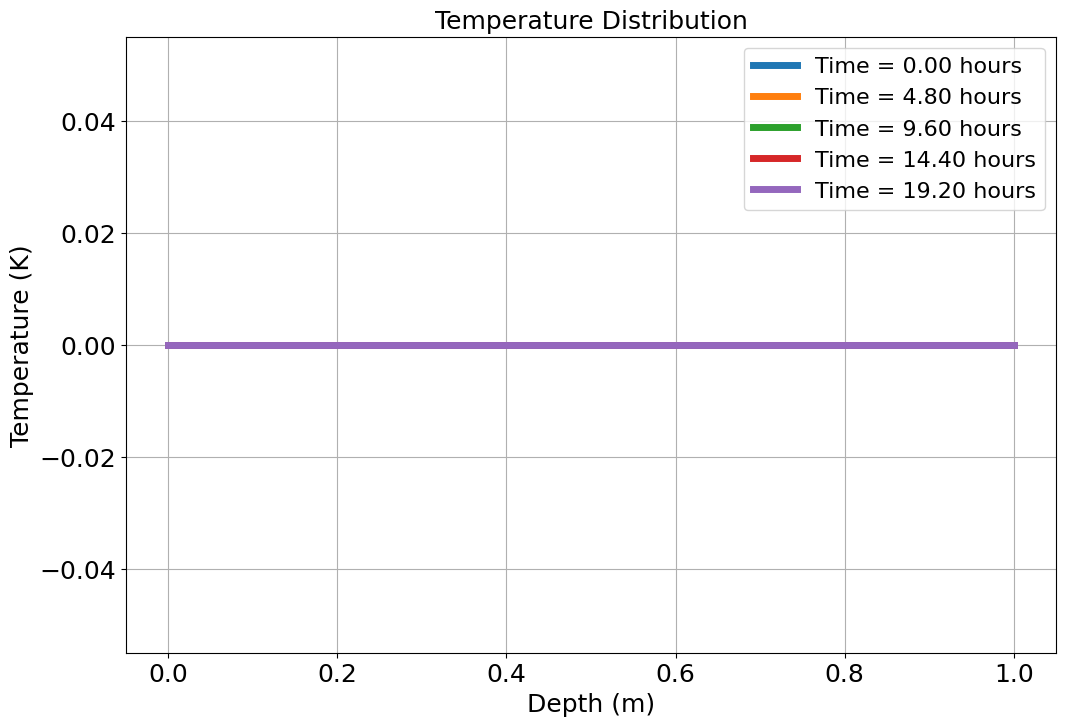

In [38]:
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

# Given data points
x = [0, 0.9892051030421982, 2.001962708537782, 2.99116781157998, 4.003925417075564, 4.993130520117763, 6.005888125613346, 6.995093228655544, 7.984298331697743, 8.997055937193327, 9.939156035328754, 10.975466143277725, 11.964671246319922, 12.977428851815505, 13.99018645731109, 14.979391560353289, 15.992149165848872, 17.004906771344455, 17.994111874386654, 19.006869479882237, 19.972522080471048, 20.961727183513247, 21.998037291462218, 22.987242394504413, 24.023552502453388]
y = [101.57894736842104, 100.65789473684208, 98.81578947368422, 97.89473684210526, 96.9736842105263, 96.0526315789474, 132.89473684210526, 264.60526315789474, 317.56578947368416, 350.7236842105263, 373.2894736842105, 385.7236842105263, 392.17105263157896, 387.56578947368416, 374.2105263157895, 352.10526315789474, 319.4078947368421, 267.82894736842104, 163.75, 117.23684210526312, 112.63157894736844, 108.9473684210526, 105.7236842105263, 102.5, 101.57894736842104]
print(len(x))
# Create interpolation function
f = interp1d(x, y)

# Constants
alpha = 0.0199 # thermal diffusivity
L = 1  # thickness of the regolith
T0 = 350  # mean surface temperature
A = 50  # amplitude of surface temperature oscillations
P = 24.0  # period of surface temperature oscillations
Nx = 50# number of spatial points in the grid
Nt = 1500  # number of time steps
dx = L / (Nx - 1)  # spatial grid size
dt = P / Nt  # time step size

# Initialize the temperature array
T = np.zeros(Nx)
print(T)

plt.figure(figsize=(12, 8))

# Define a list of markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
Intial_Temperature = [101,96,350, 374, 117, 101]
# Time evolution
for j in range(Nt):
    # Update interior points
    for i in range(1, Nx - 1):
        T[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    
    # Update surface point with sinusoidal forcing
    if j % 60 == 0:
        print(j%60)
        T[0] == y[j%60]
        print(T[0])
    
    # Update bottom point with zero flux condition
    T[-1] = T[-2]

    # Plot every 100 time steps
    if j % 300 == 0:
        # Use a different marker for each line
        marker = markers[j // 400 % len(markers)]
        plt.plot(np.linspace(0, L, Nx), T, linestyle='-',linewidth=5, label=f'Time = {j*dt:.2f} hours')

plt.xlabel('Depth (m)', fontsize=18)
plt.ylabel('Temperature (K)', fontsize=18)
plt.title('Temperature Distribution', fontsize=18)
plt.grid(True)
plt.legend(fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

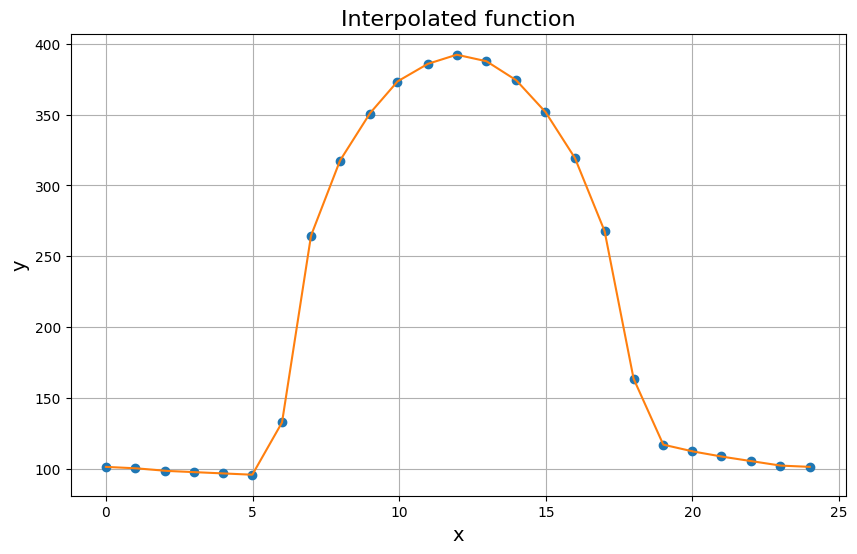

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

# Given data points
x = [0, 0.9892051030421982, 2.001962708537782, 2.99116781157998, 4.003925417075564, 4.993130520117763, 6.005888125613346, 6.995093228655544, 7.984298331697743, 8.997055937193327, 9.939156035328754, 10.975466143277725, 11.964671246319922, 12.977428851815505, 13.99018645731109, 14.979391560353289, 15.992149165848872, 17.004906771344455, 17.994111874386654, 19.006869479882237, 19.972522080471048, 20.961727183513247, 21.998037291462218, 22.987242394504413, 24.023552502453388]
y = [101.57894736842104, 100.65789473684208, 98.81578947368422, 97.89473684210526, 96.9736842105263, 96.0526315789474, 132.89473684210526, 264.60526315789474, 317.56578947368416, 350.7236842105263, 373.2894736842105, 385.7236842105263, 392.17105263157896, 387.56578947368416, 374.2105263157895, 352.10526315789474, 319.4078947368421, 267.82894736842104, 163.75, 117.23684210526312, 112.63157894736844, 108.9473684210526, 105.7236842105263, 102.5, 101.57894736842104]

# Create interpolation function
f = interp1d(x, y)

# Generate x values for the interpolated function
xnew = np.linspace(0, 24, num=1000, endpoint=True)

# Plot the original data points and the interpolated function
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', xnew, f(xnew), '-')
plt.xlabel('Time (hour)', fontsize=14)
plt.ylabel('Temperature (K)', fontsize=14)
plt.title('Interpolated function', fontsize=16)
plt.grid(True)
plt.show()

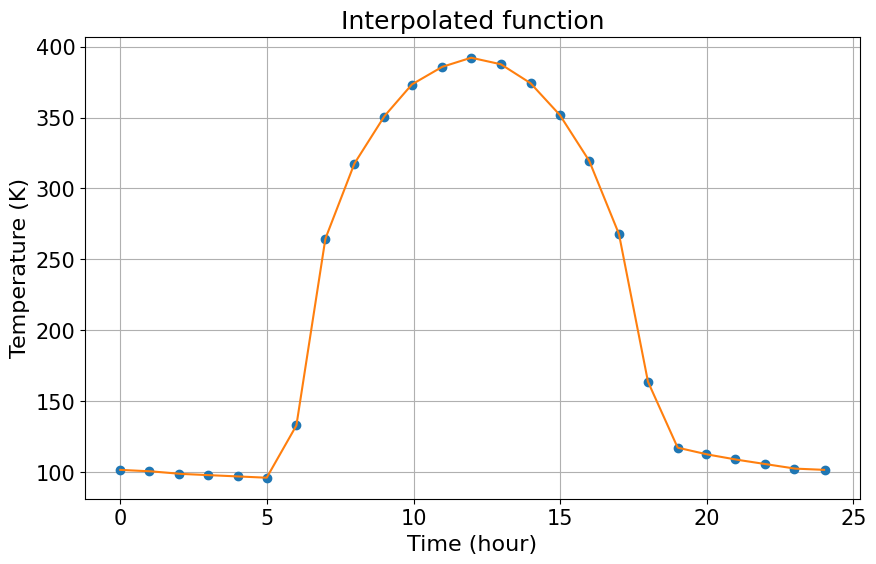

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

# Given data points
x = [0, 0.9892051030421982, 2.001962708537782, 2.99116781157998, 4.003925417075564, 4.993130520117763, 6.005888125613346, 6.995093228655544, 7.984298331697743, 8.997055937193327, 9.939156035328754, 10.975466143277725, 11.964671246319922, 12.977428851815505, 13.99018645731109, 14.979391560353289, 15.992149165848872, 17.004906771344455, 17.994111874386654, 19.006869479882237, 19.972522080471048, 20.961727183513247, 21.998037291462218, 22.987242394504413, 24.023552502453388]
y = [101.57894736842104, 100.65789473684208, 98.81578947368422, 97.89473684210526, 96.9736842105263, 96.0526315789474, 132.89473684210526, 264.60526315789474, 317.56578947368416, 350.7236842105263, 373.2894736842105, 385.7236842105263, 392.17105263157896, 387.56578947368416, 374.2105263157895, 352.10526315789474, 319.4078947368421, 267.82894736842104, 163.75, 117.23684210526312, 112.63157894736844, 108.9473684210526, 105.7236842105263, 102.5, 101.57894736842104]

# Create interpolation function
f = interp1d(x, y)

# Generate x values for the interpolated function
xnew = np.linspace(0, 24, num=1000, endpoint=True)

# Plot the original data points and the interpolated function
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', xnew, f(xnew), '-')
plt.xlabel('Time (hour)', fontsize=16)
plt.ylabel('Temperature (K)', fontsize=16)
plt.title('Interpolated function', fontsize=18)
plt.grid(True)

# Enlarge the numbers on the axes
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

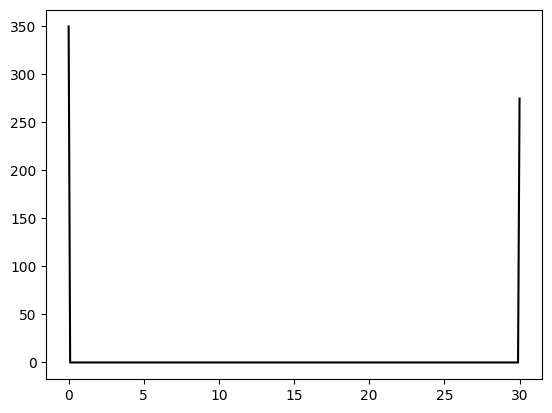

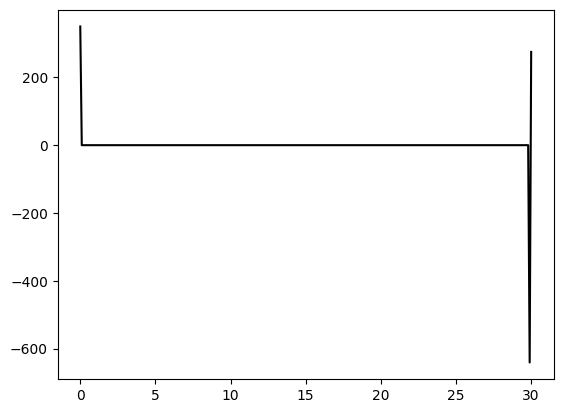

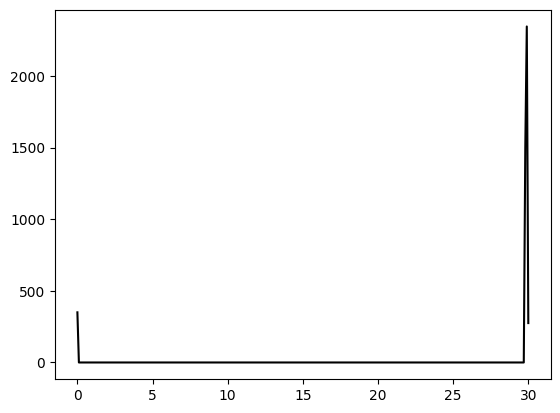

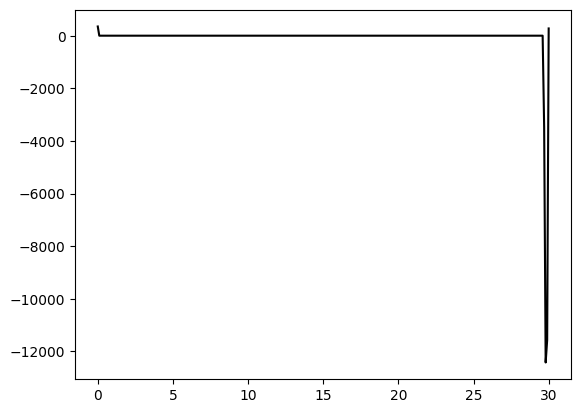

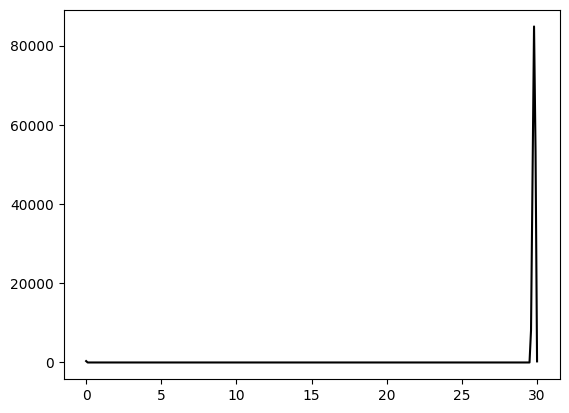

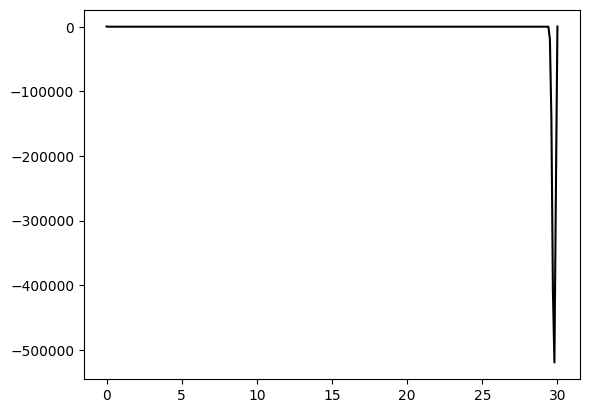

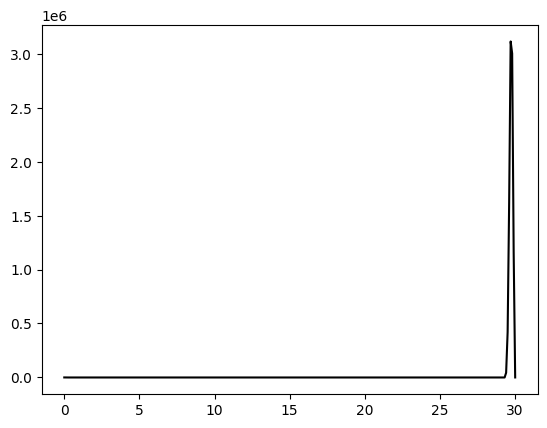

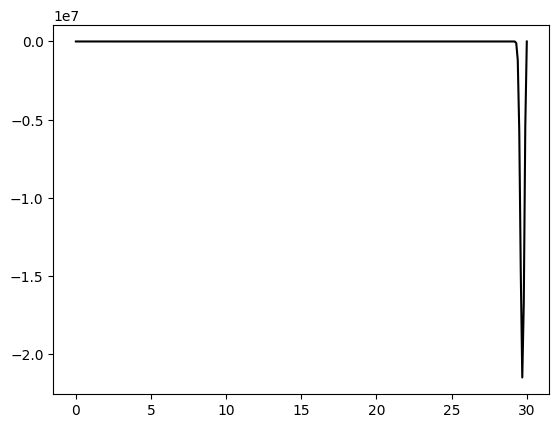

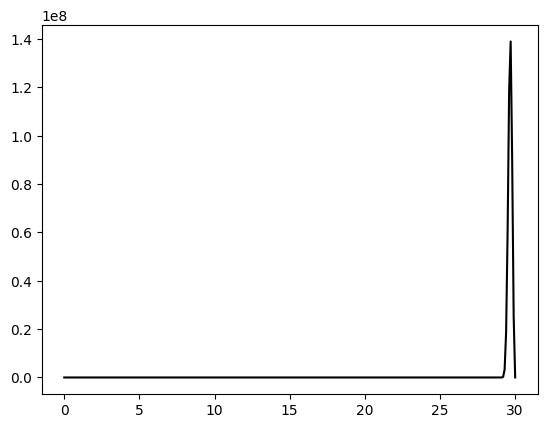

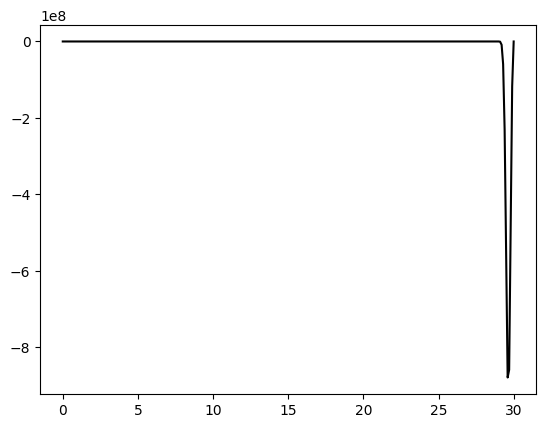

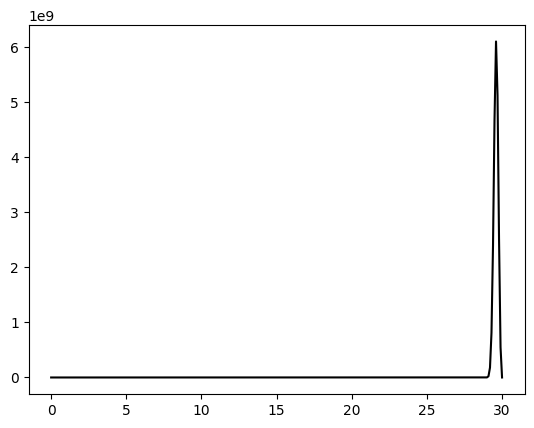

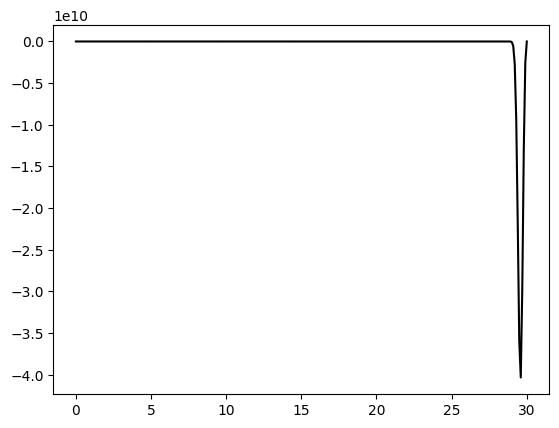

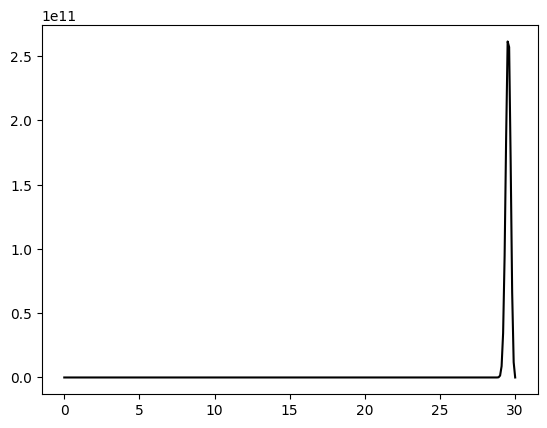

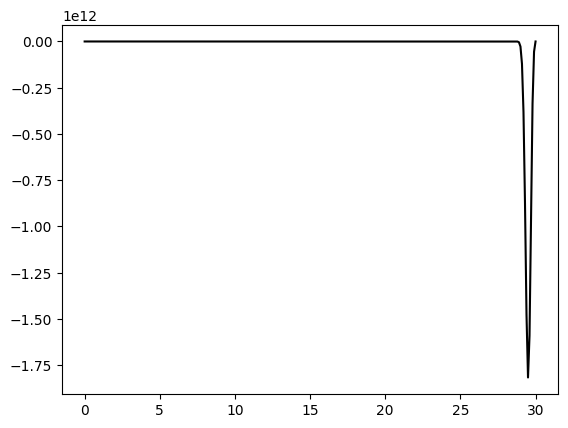

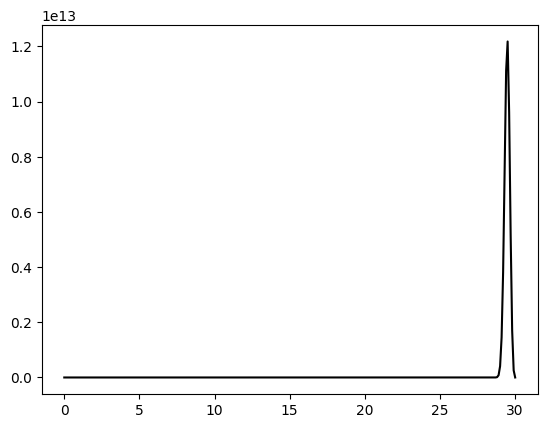

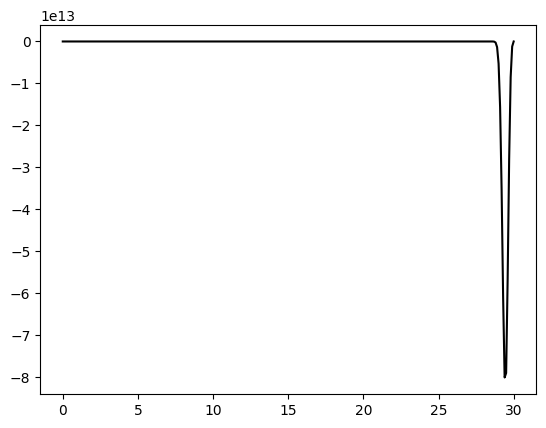

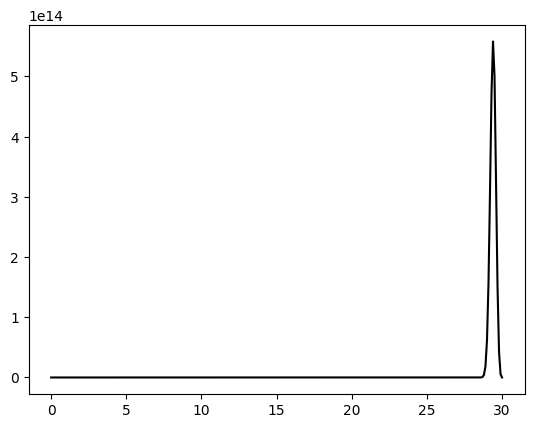

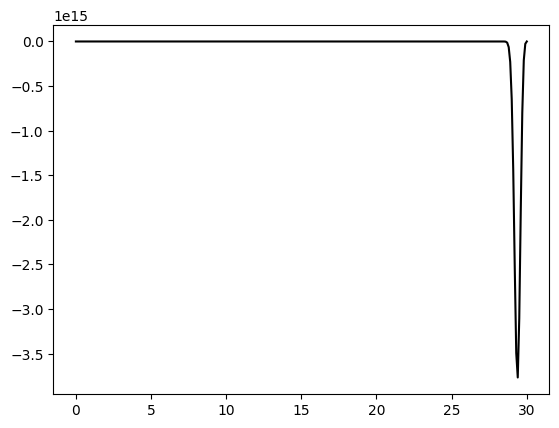

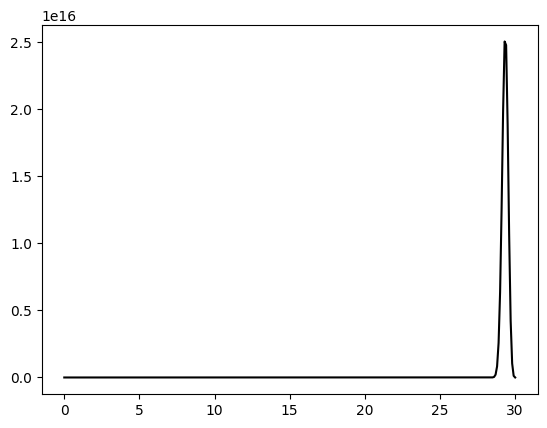

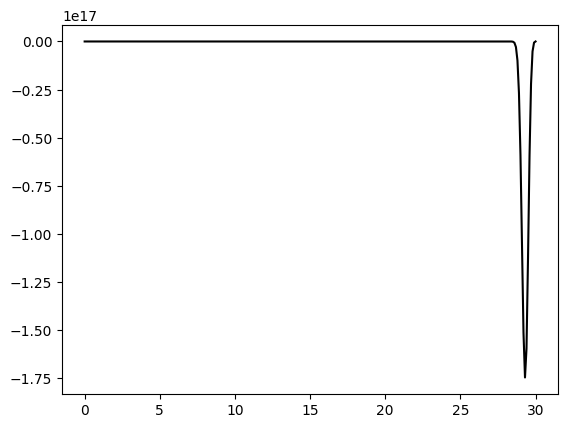

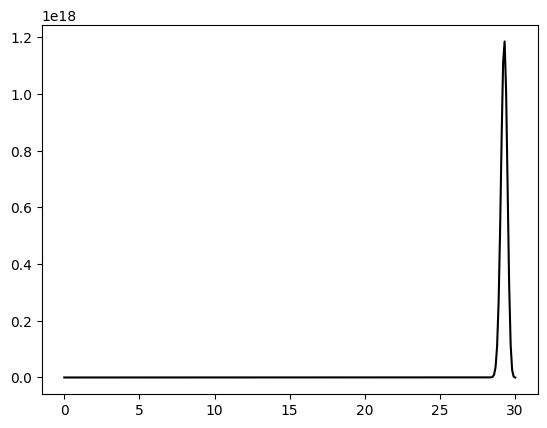

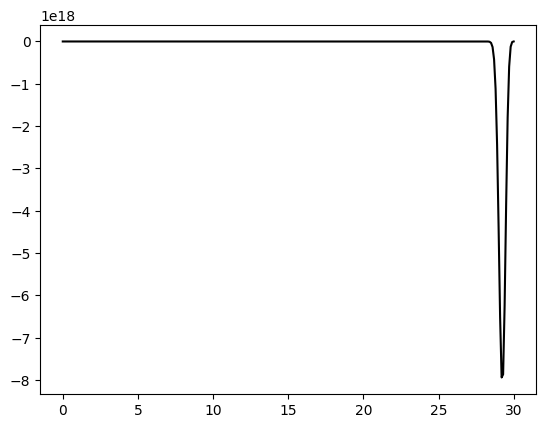

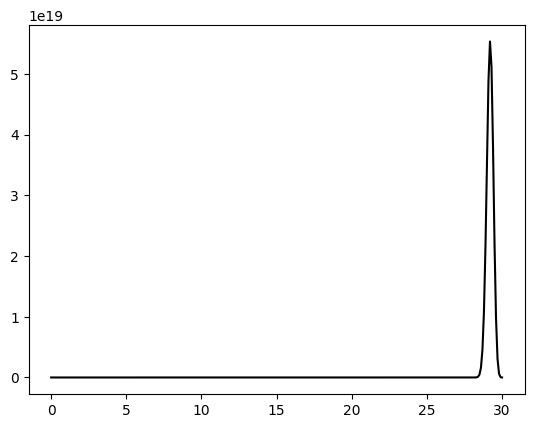

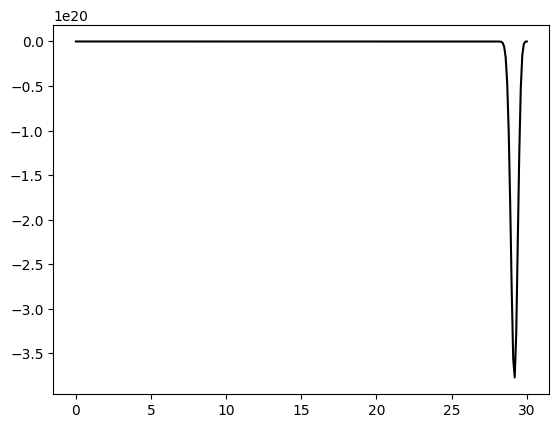

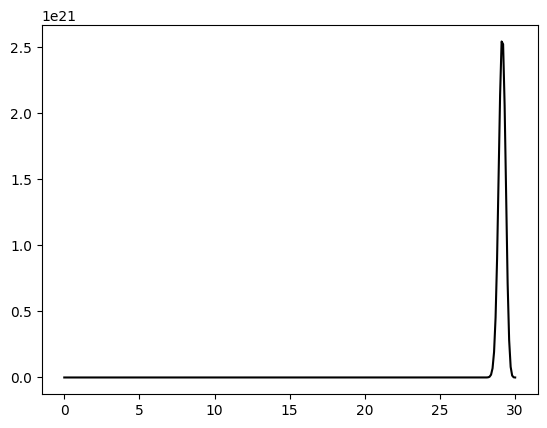

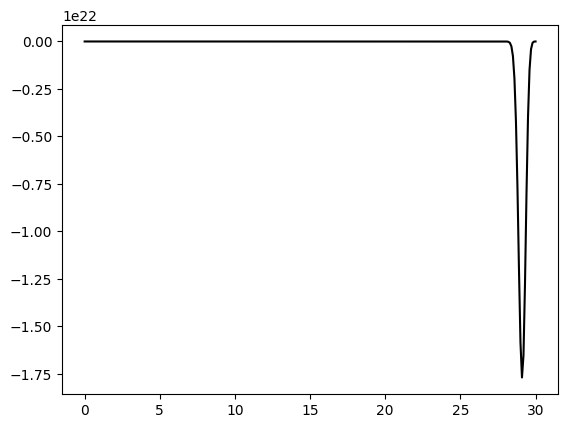

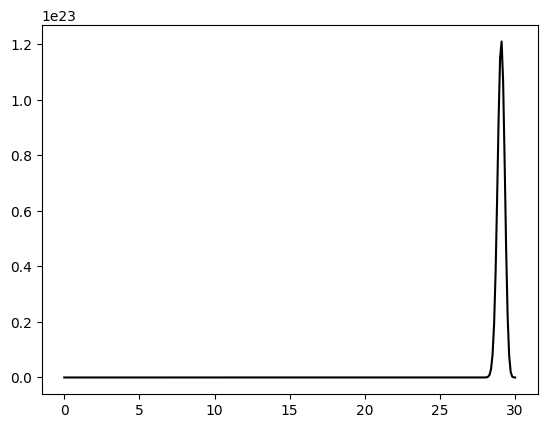

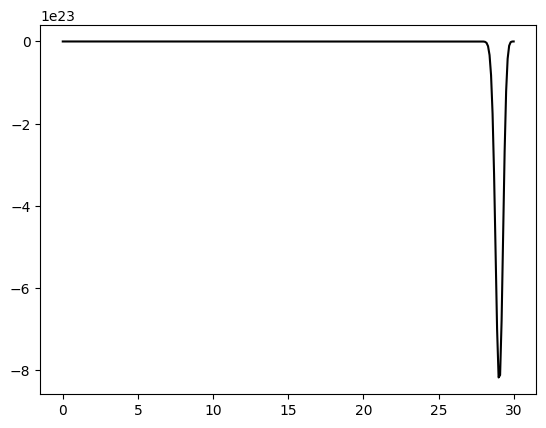

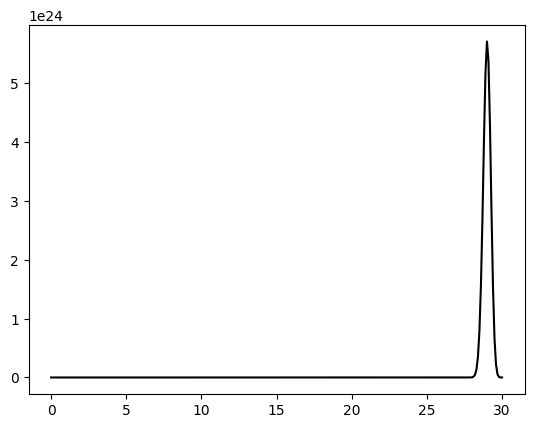

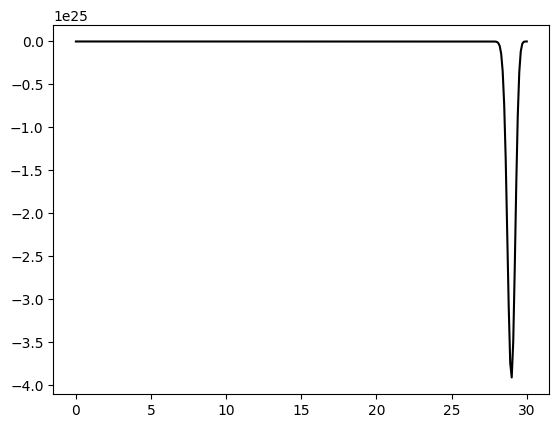

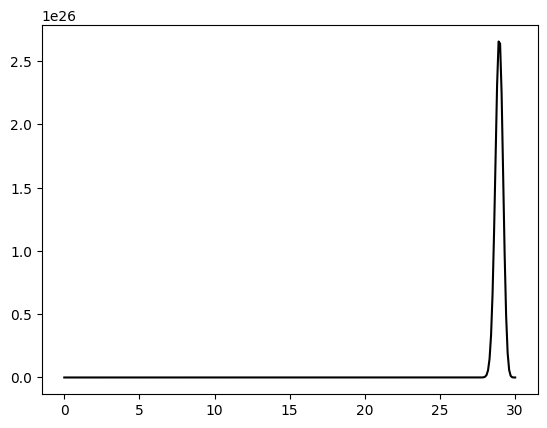

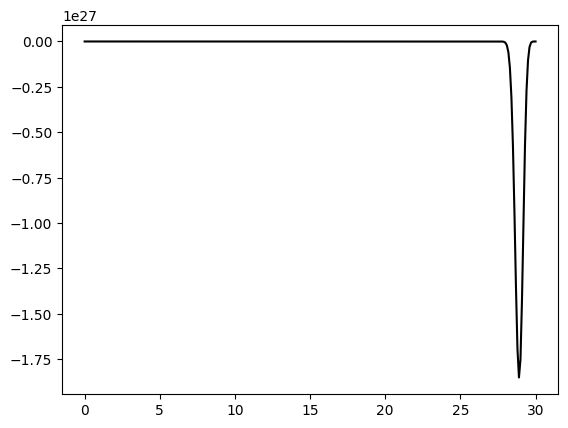

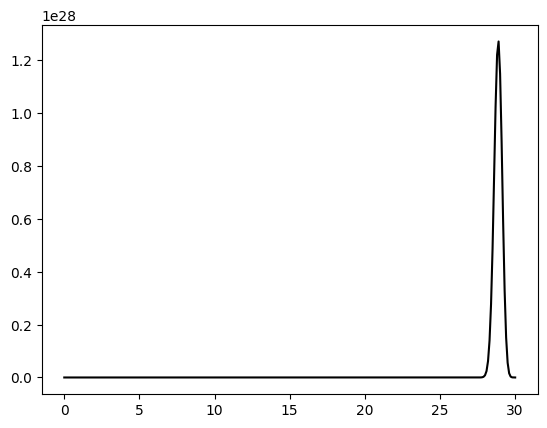

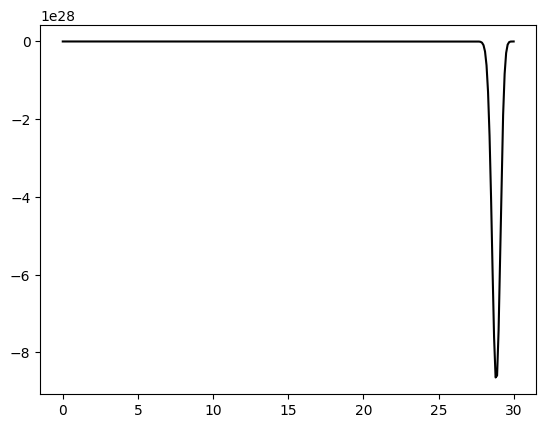

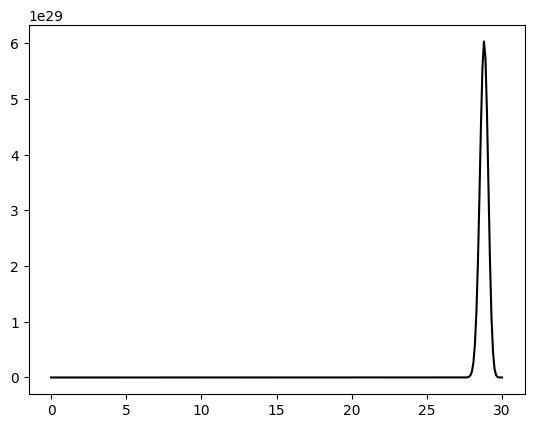

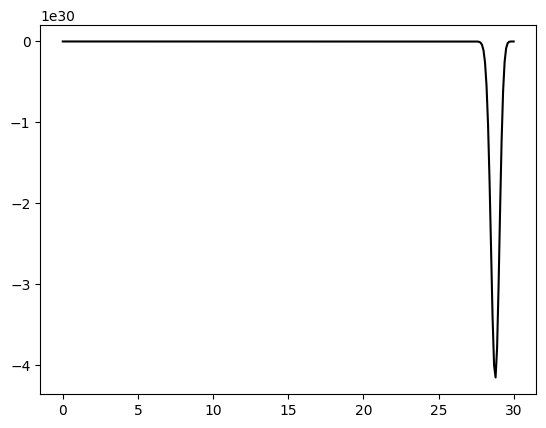

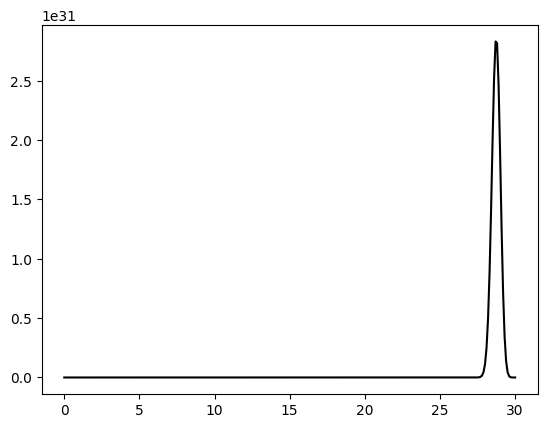

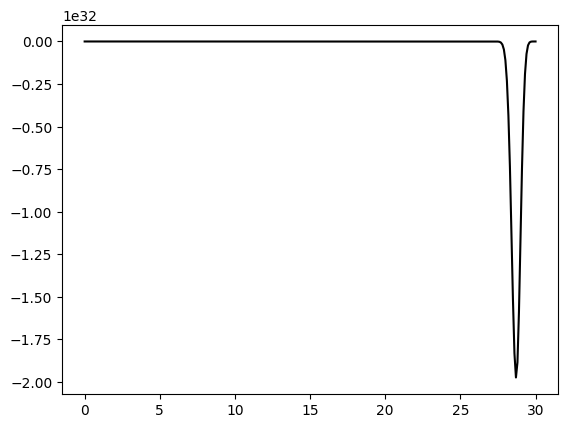

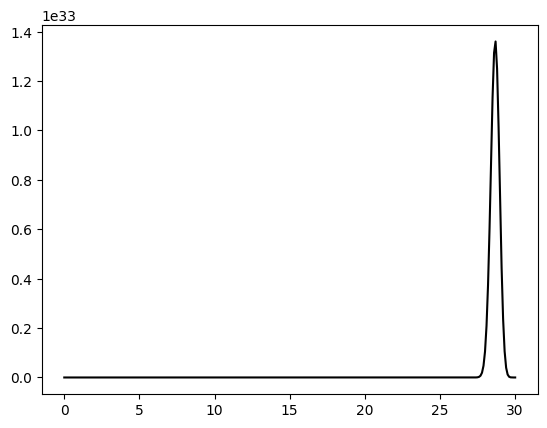

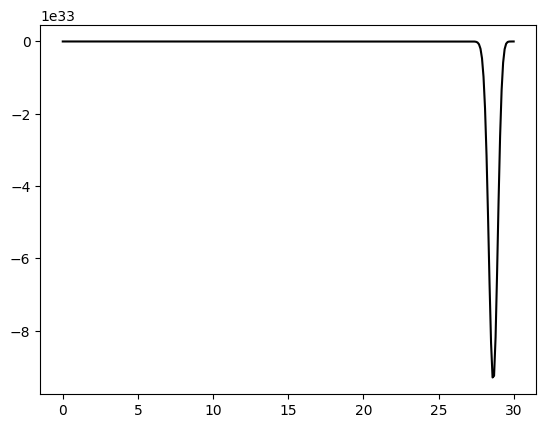

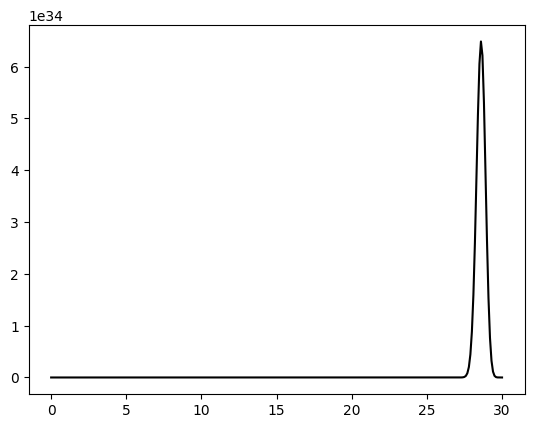

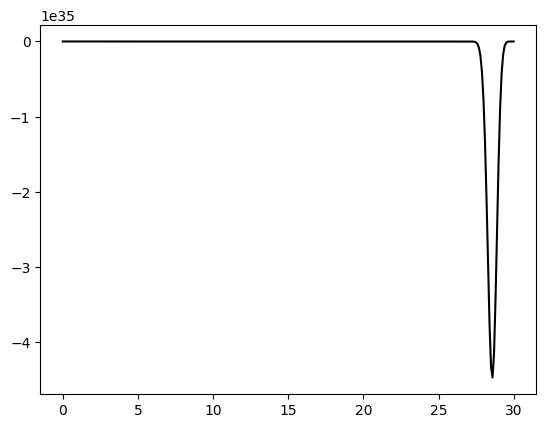

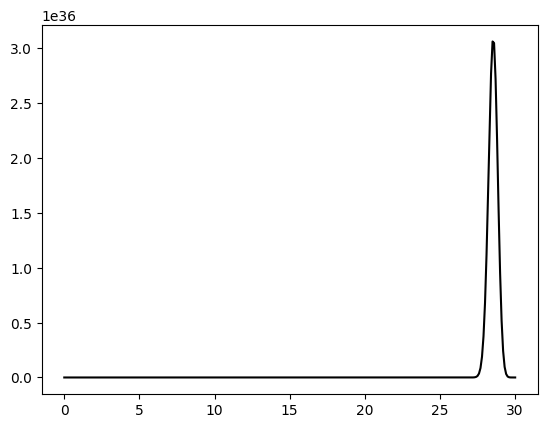

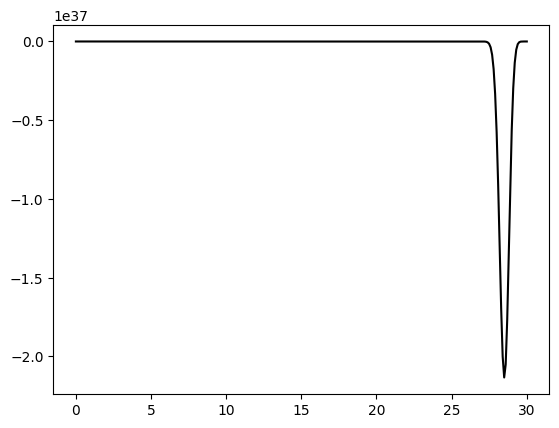

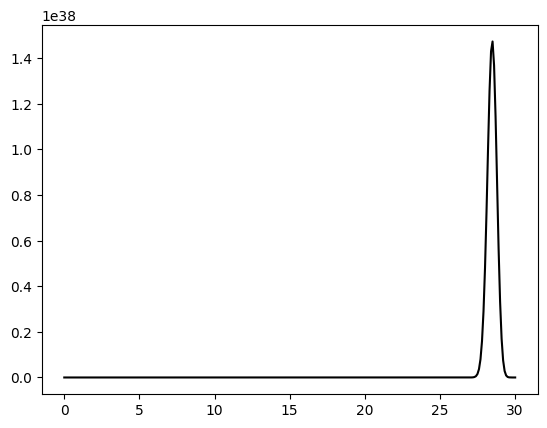

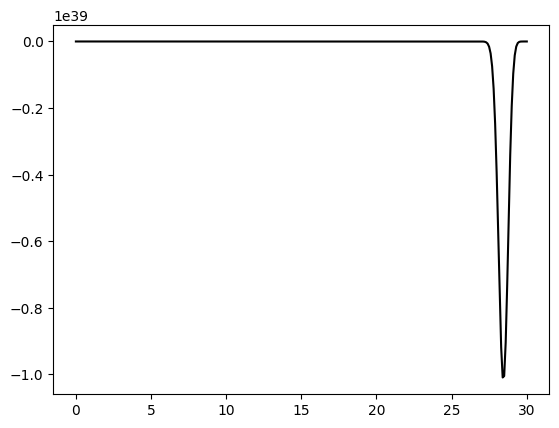

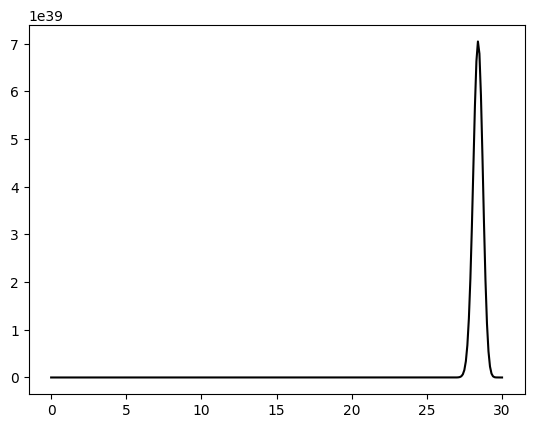

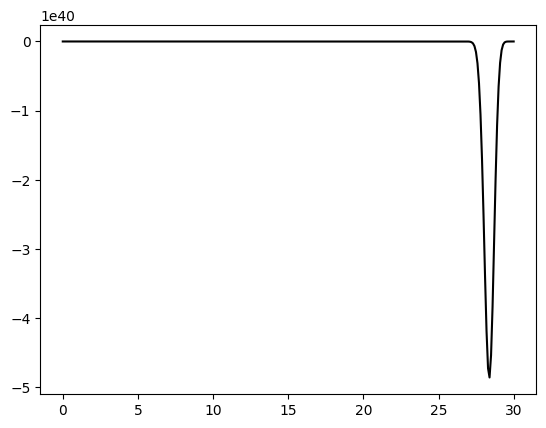

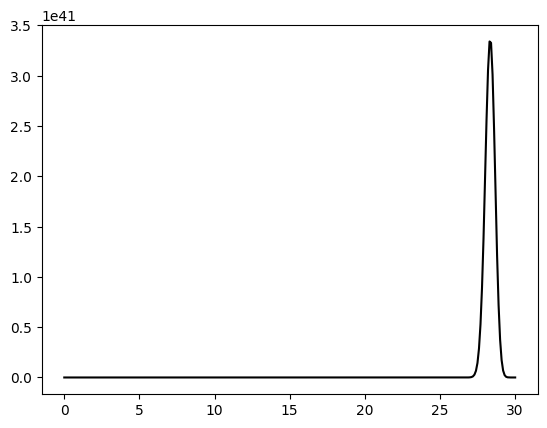

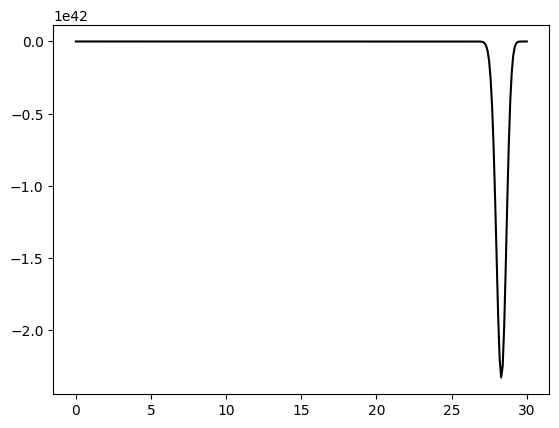

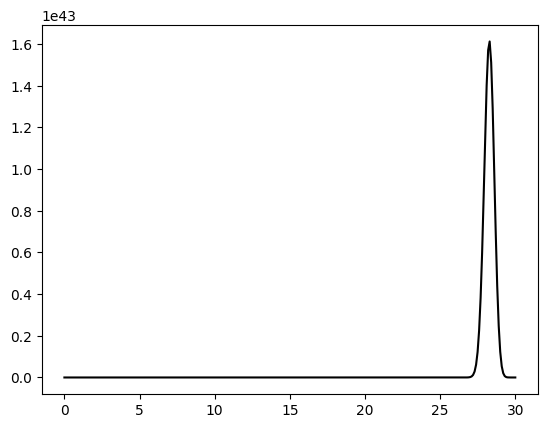

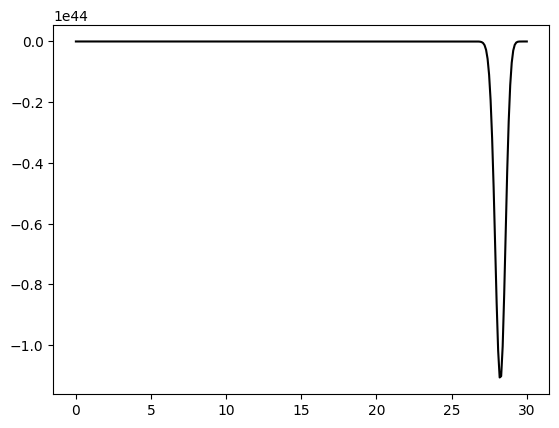

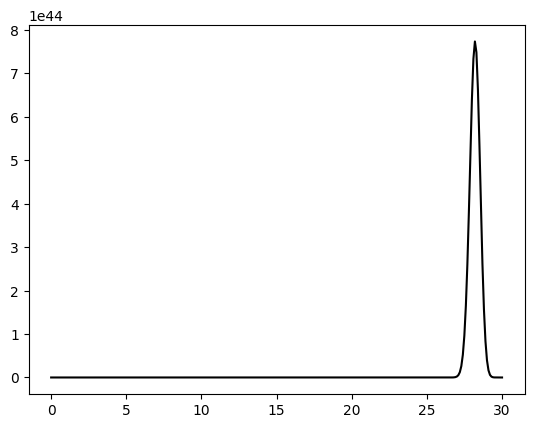

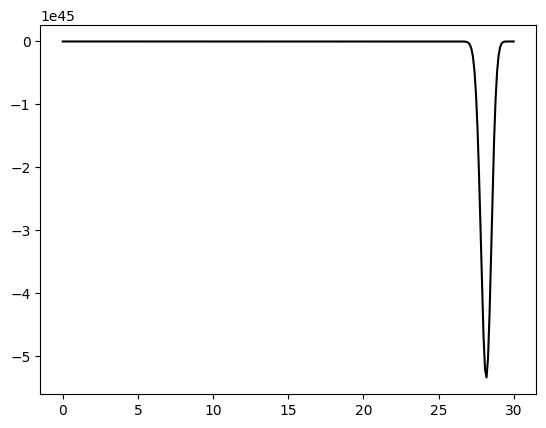

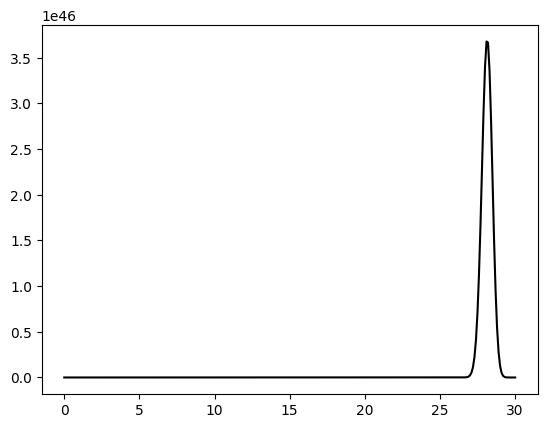

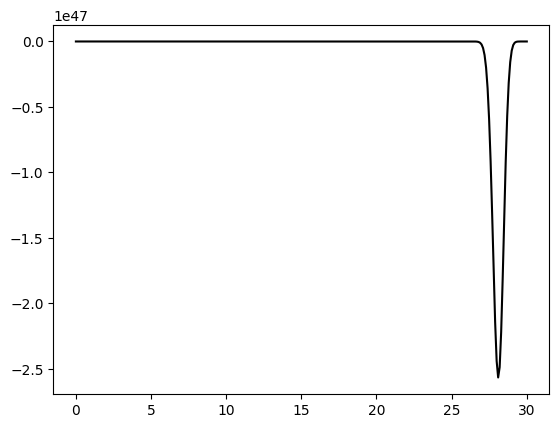

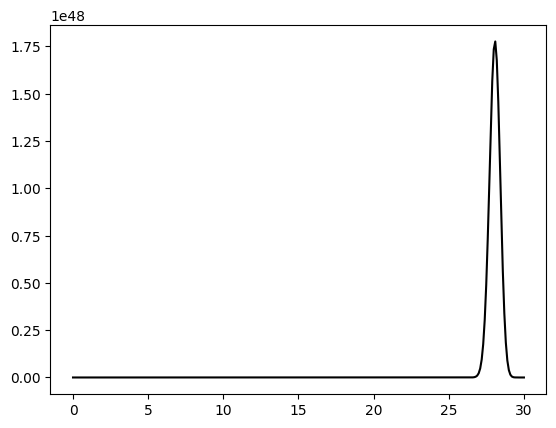

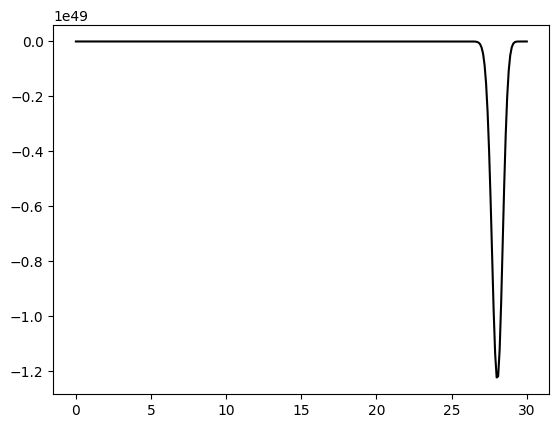

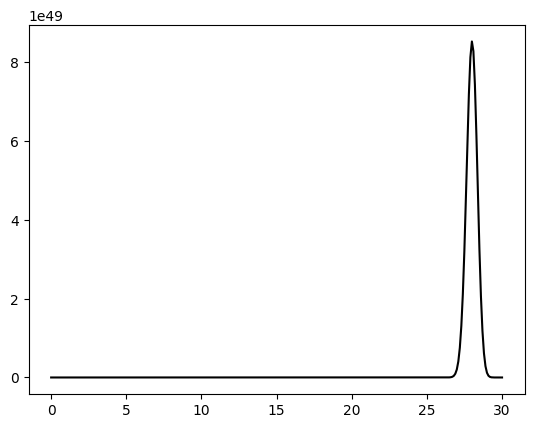

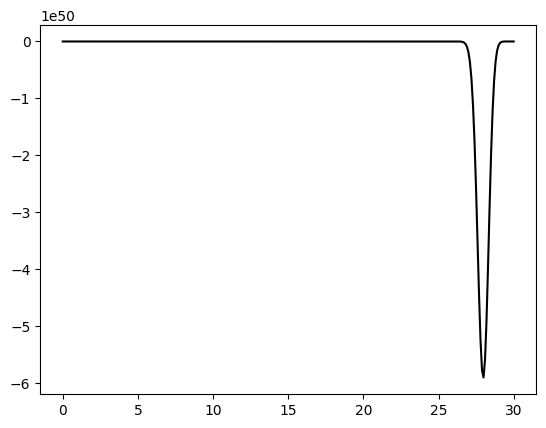

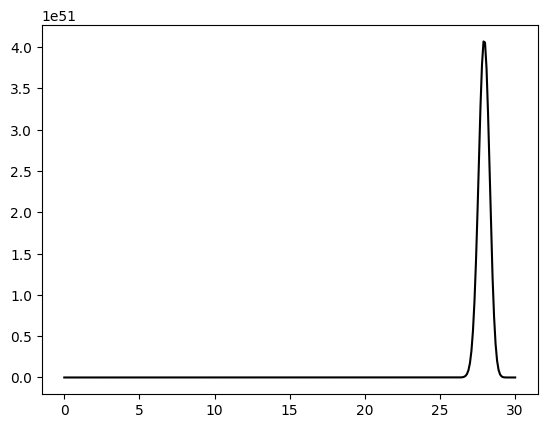

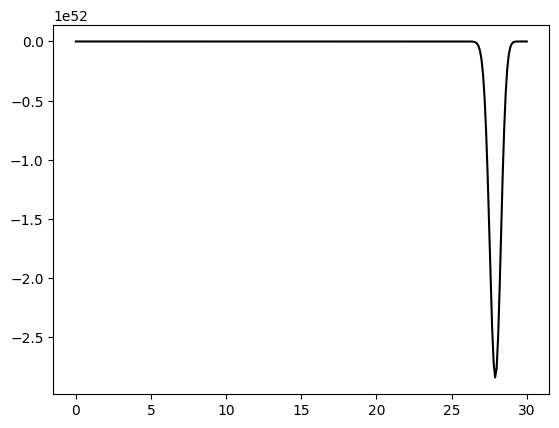

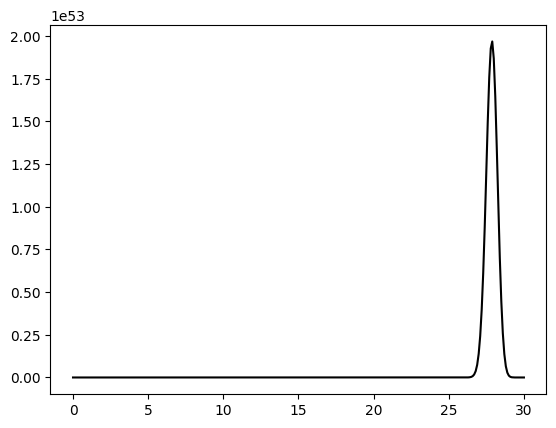

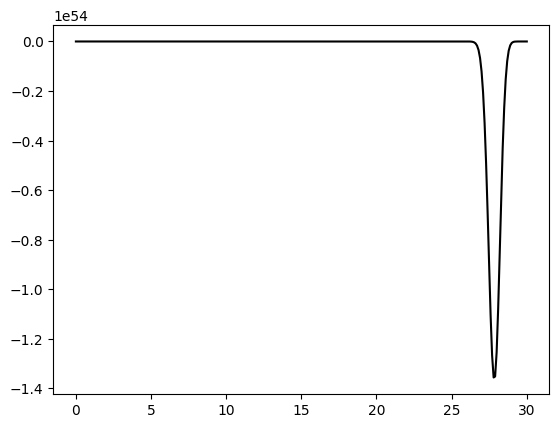

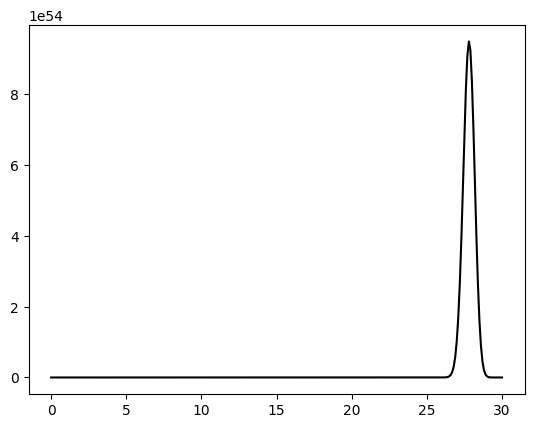

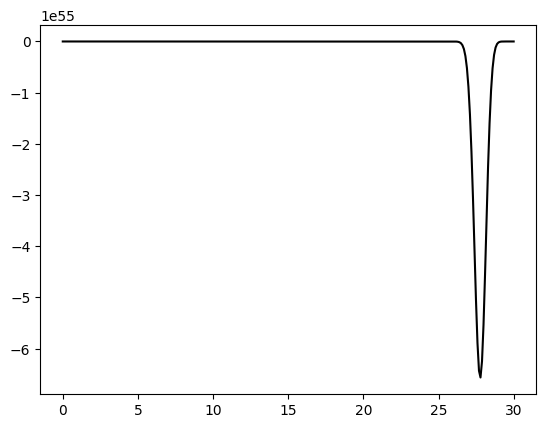

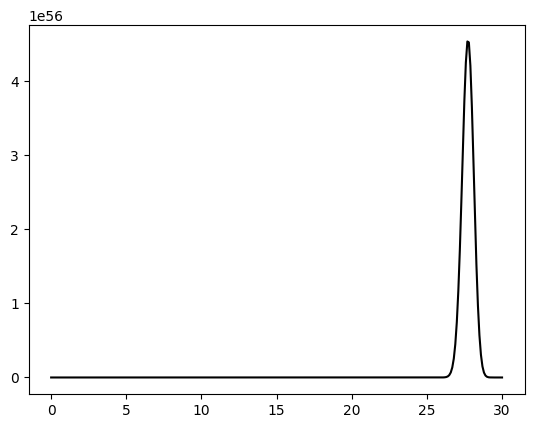

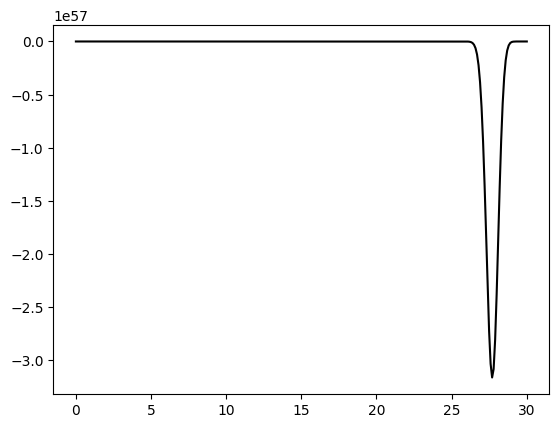

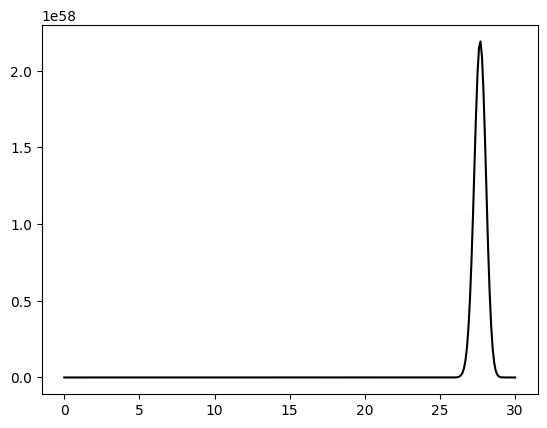

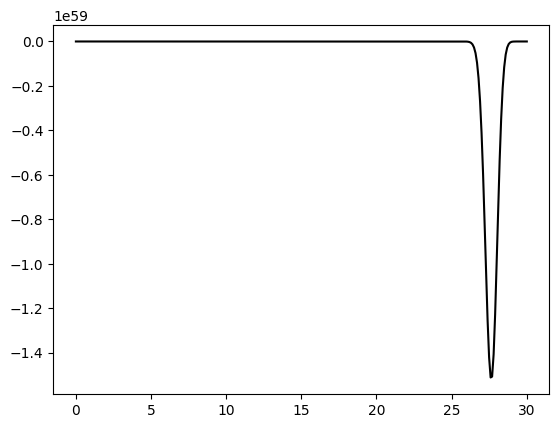

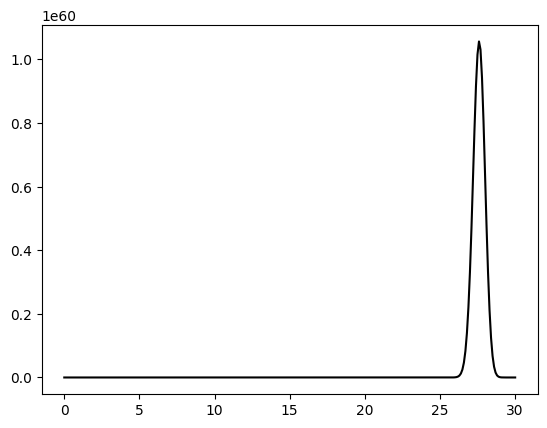

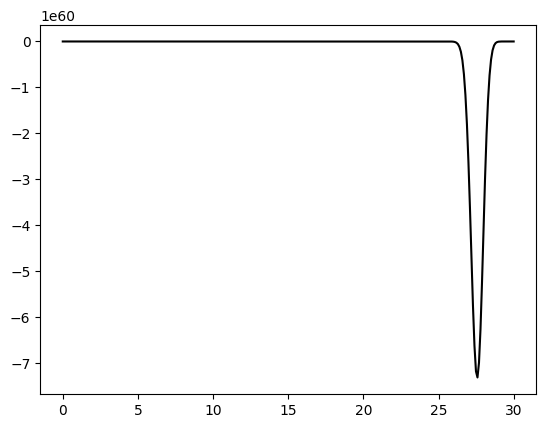

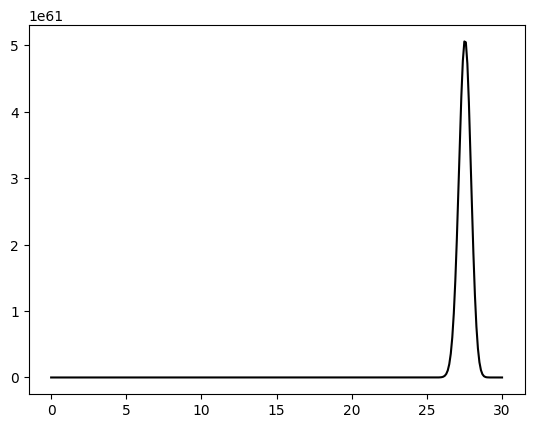

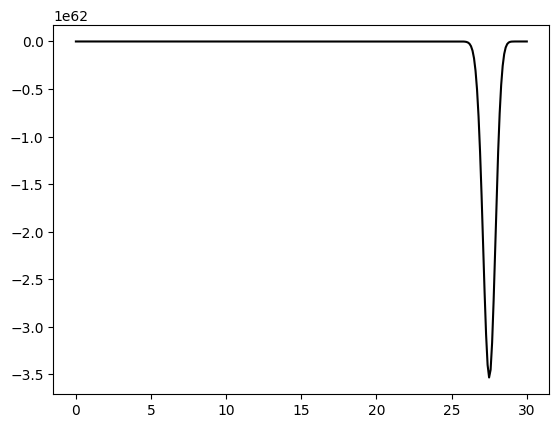

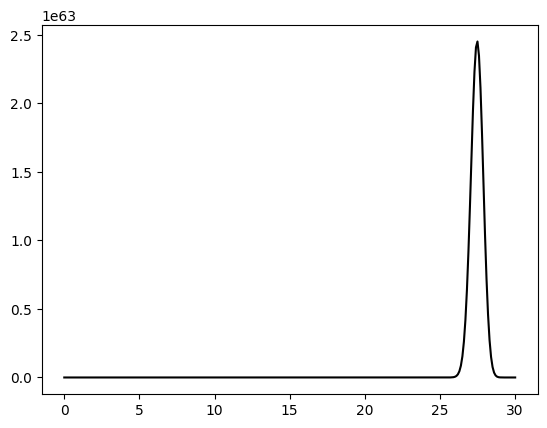

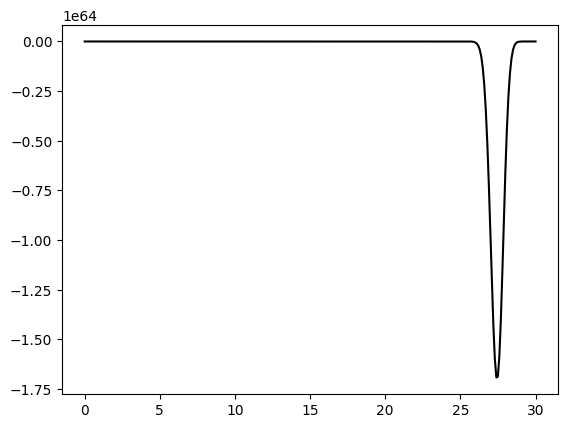

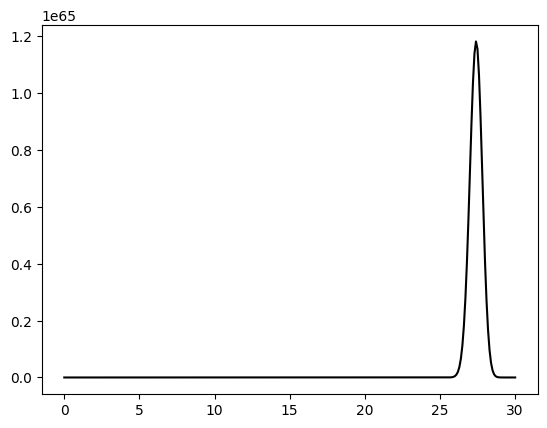

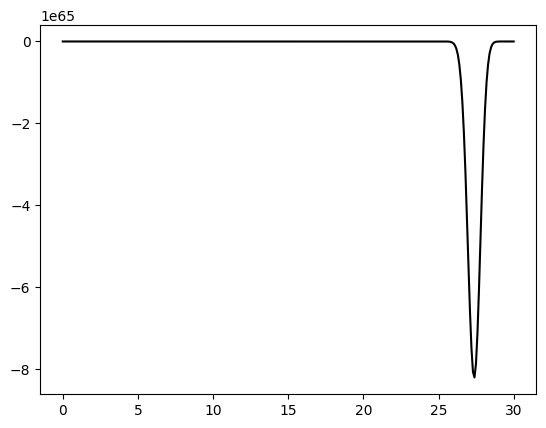

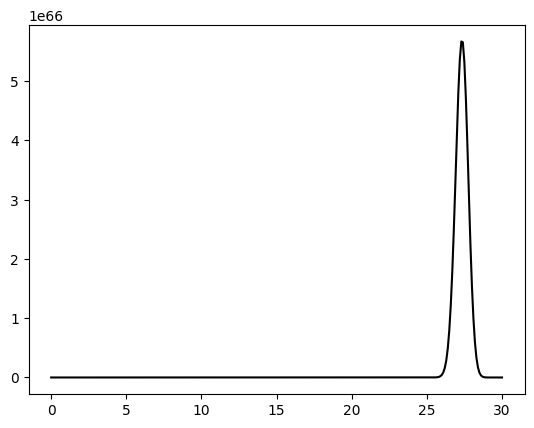

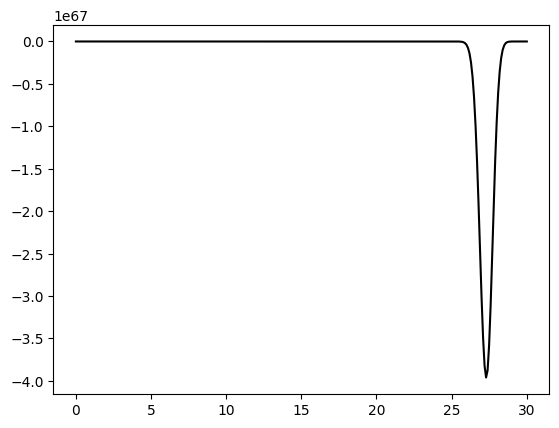

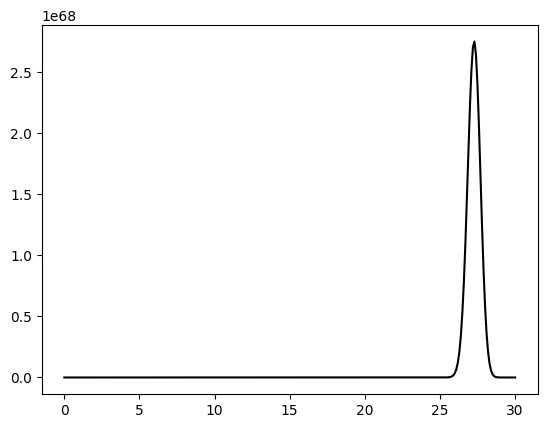

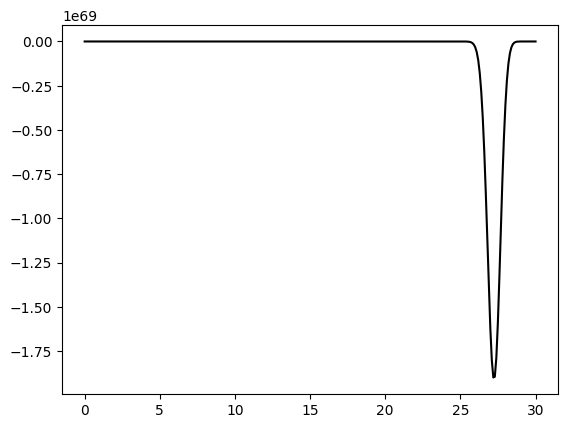

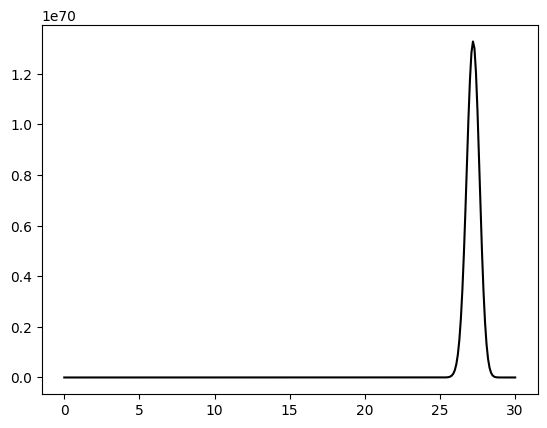

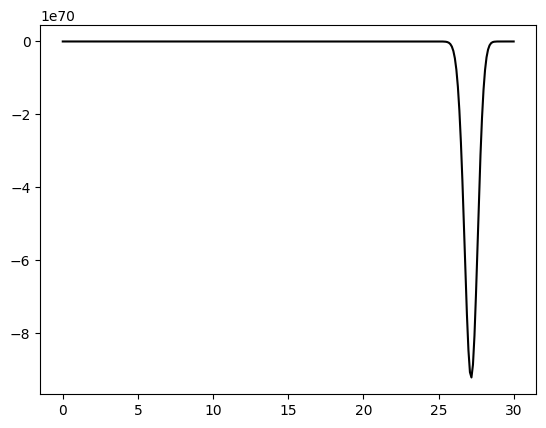

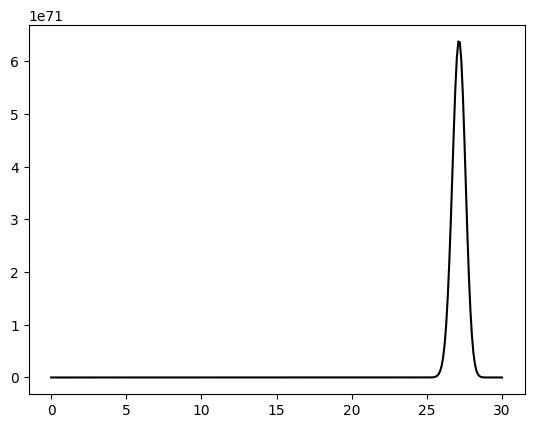

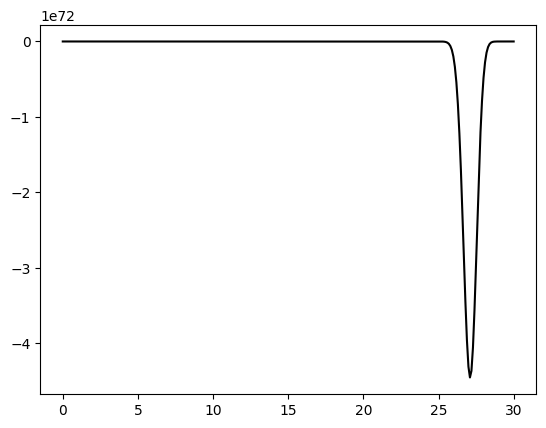

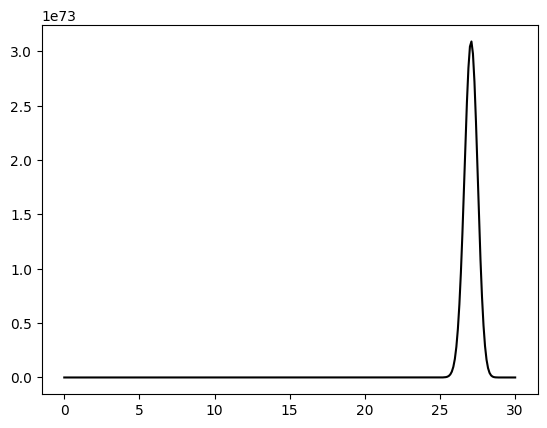

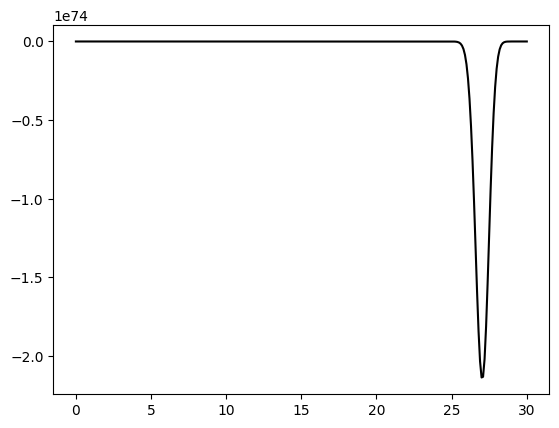

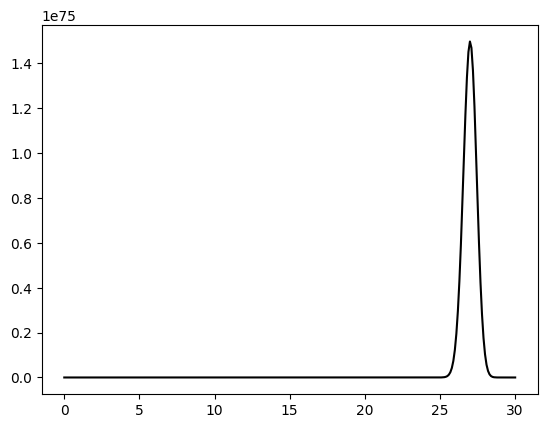

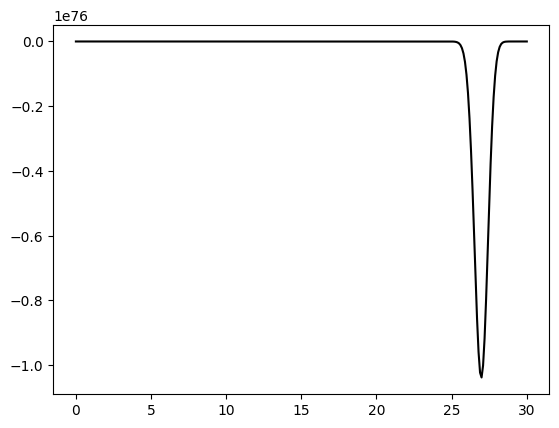

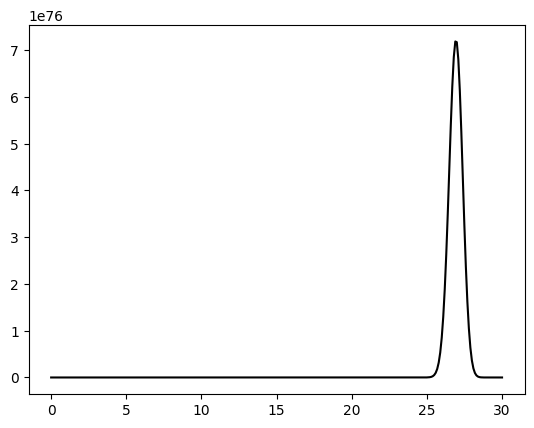

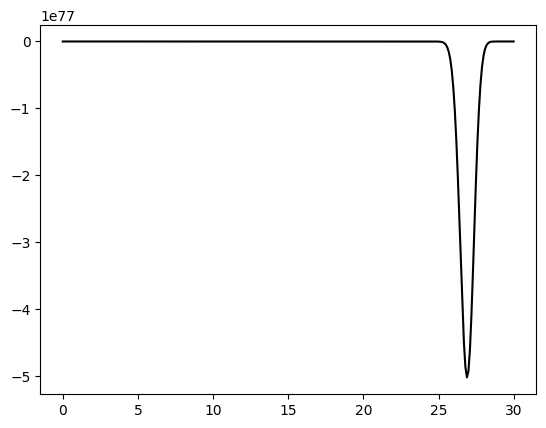

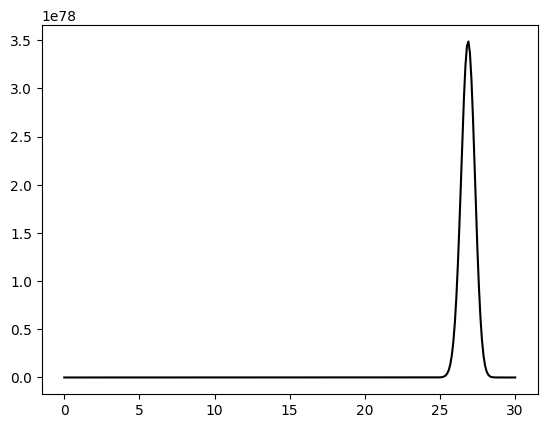

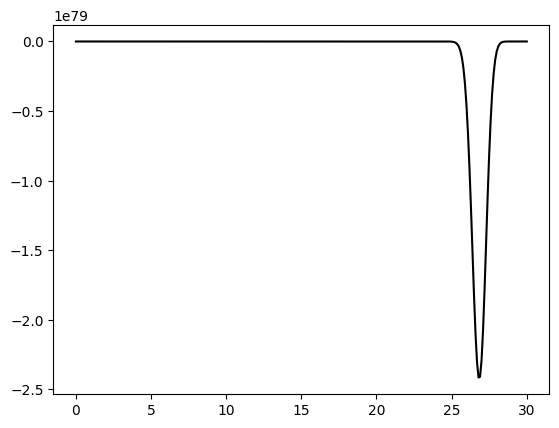

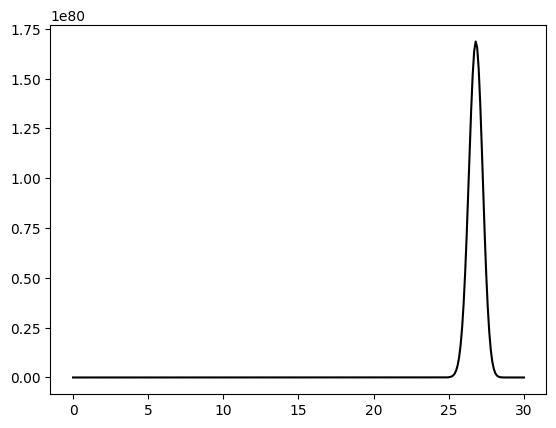

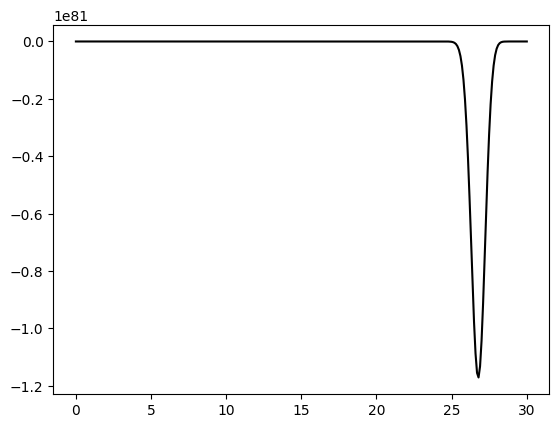

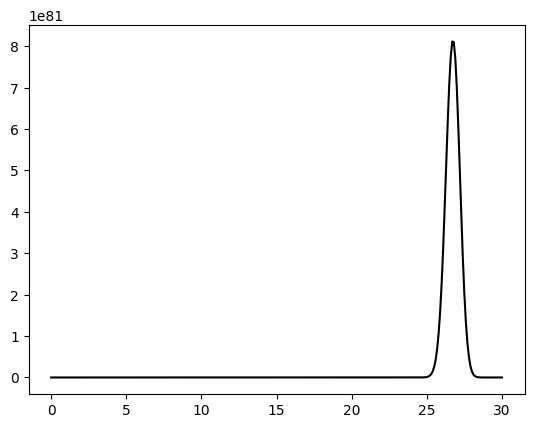

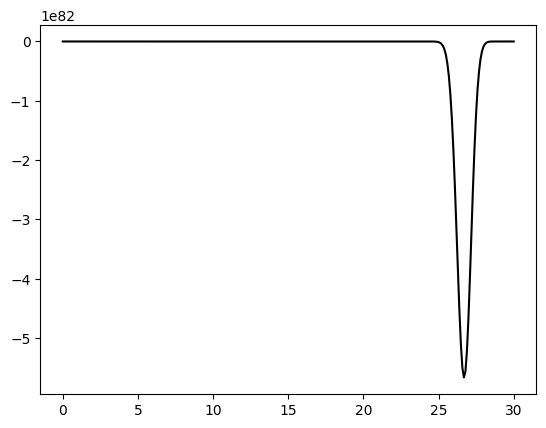

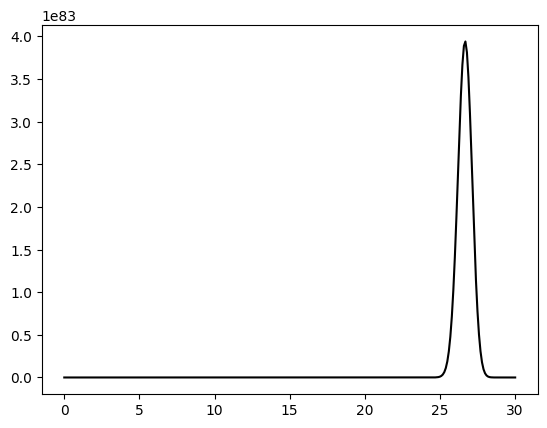

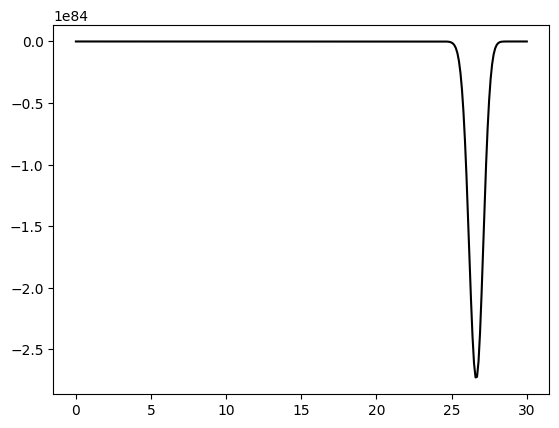

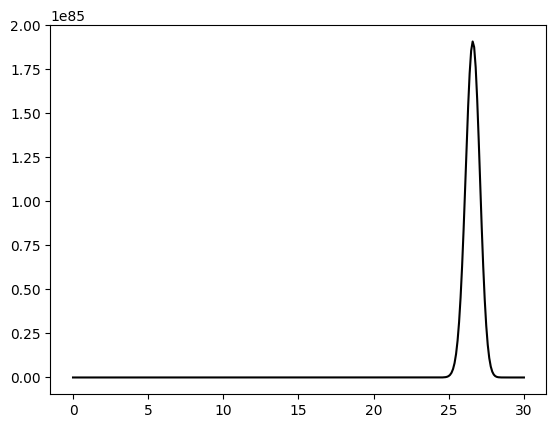

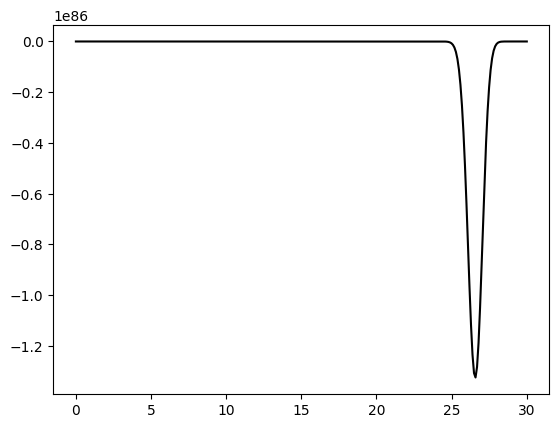

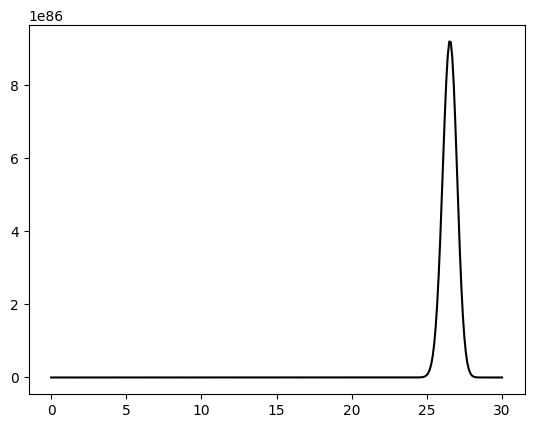

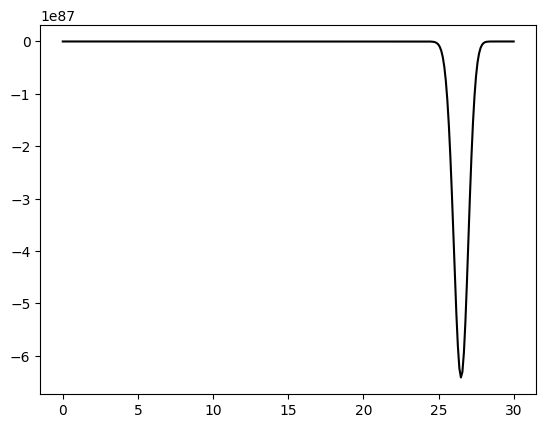

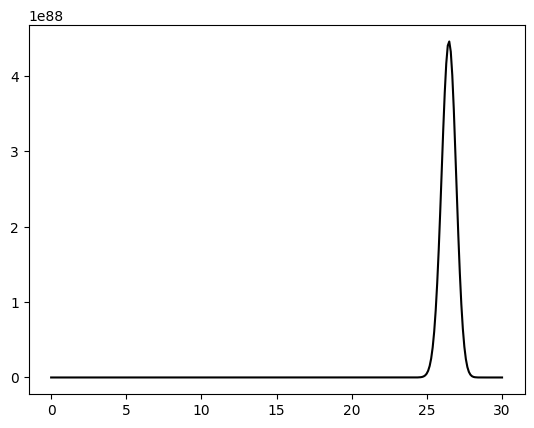

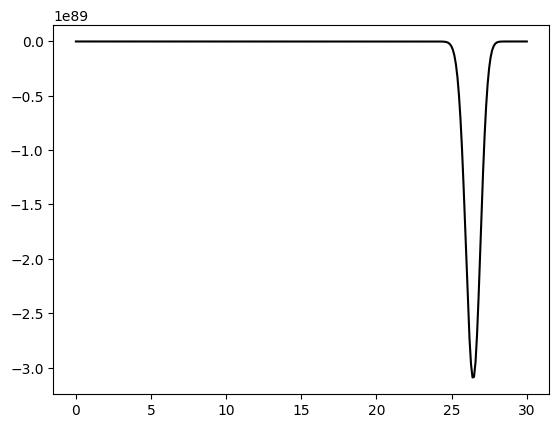

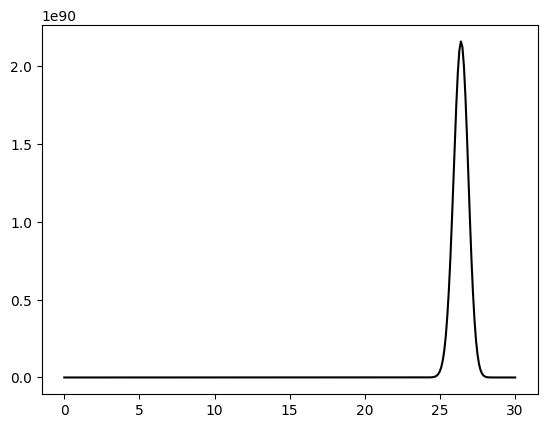

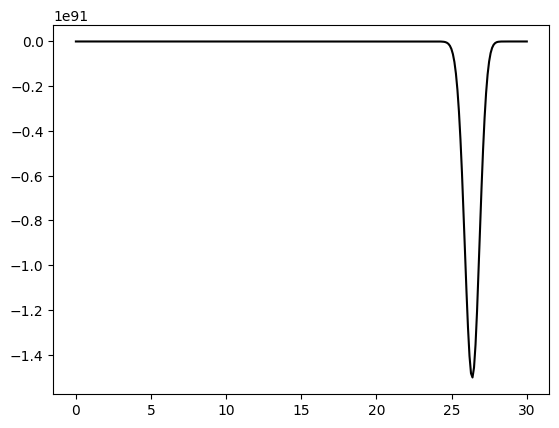

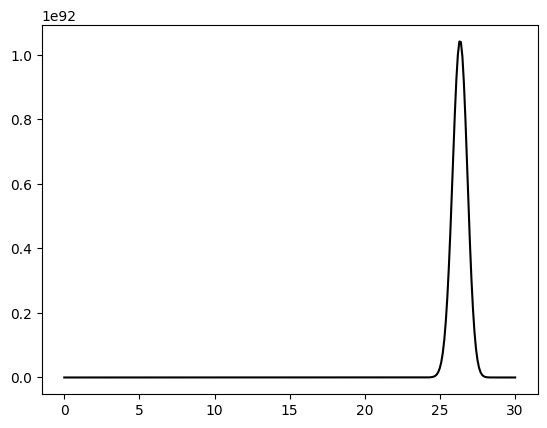

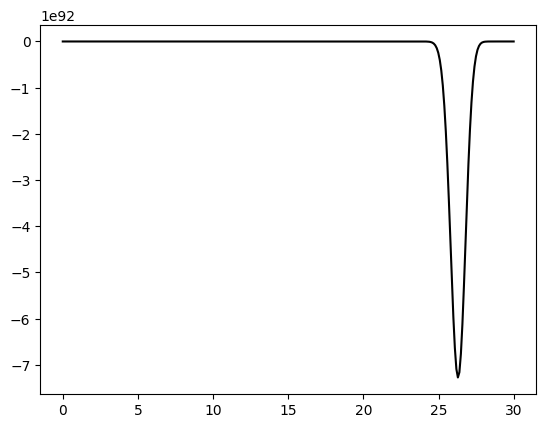

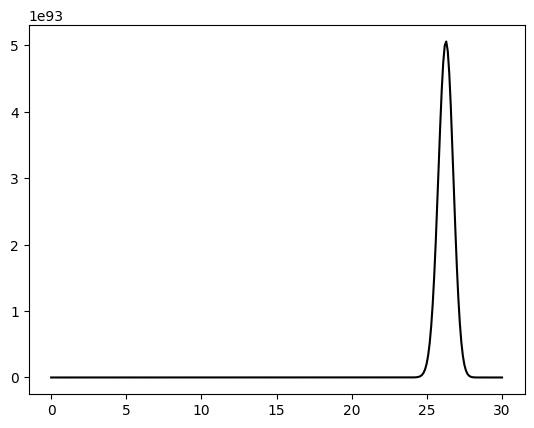

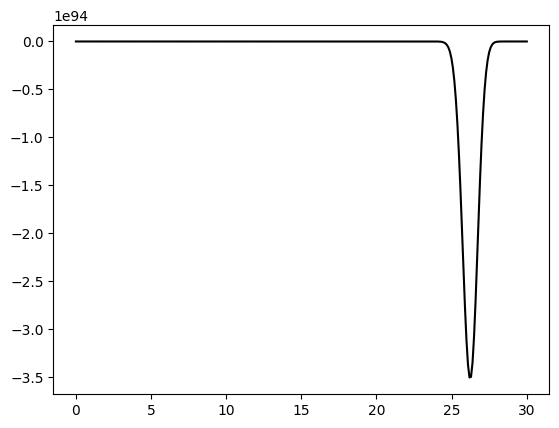

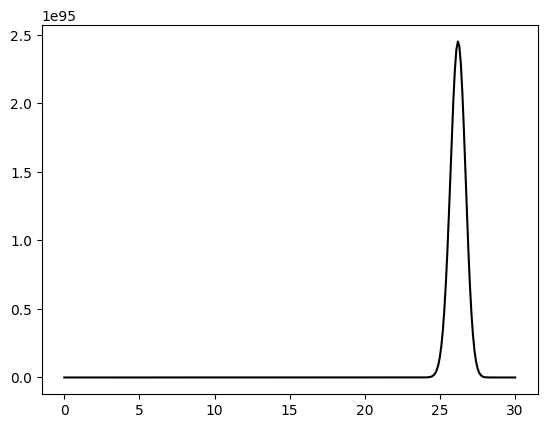

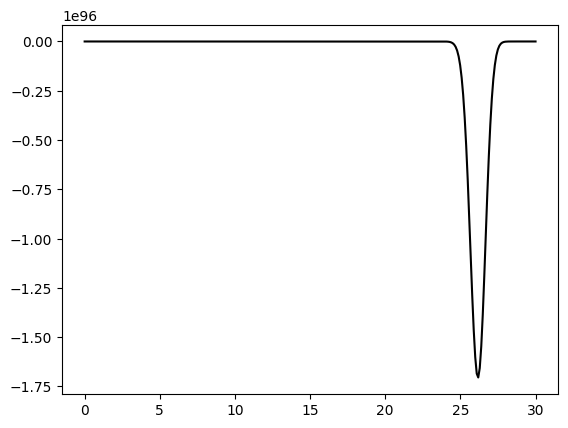

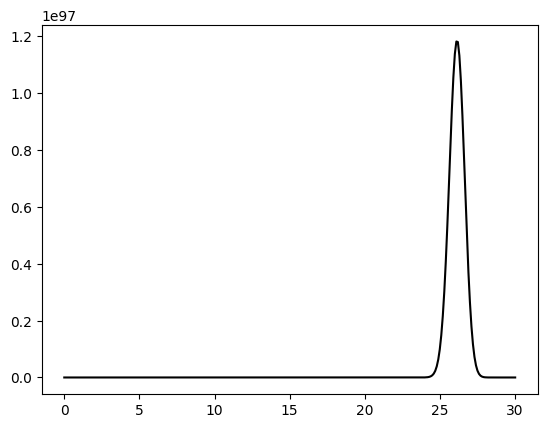

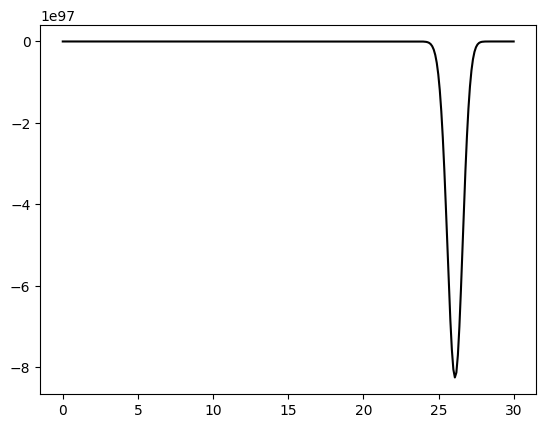

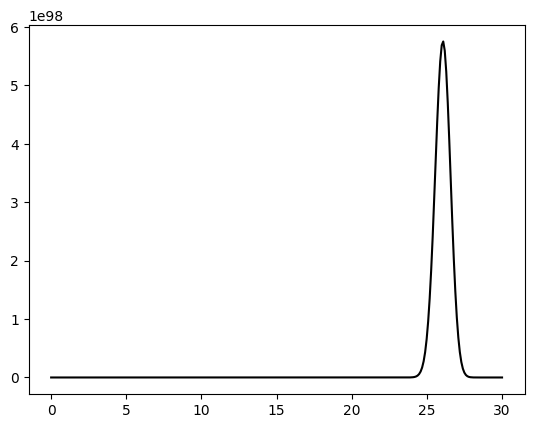

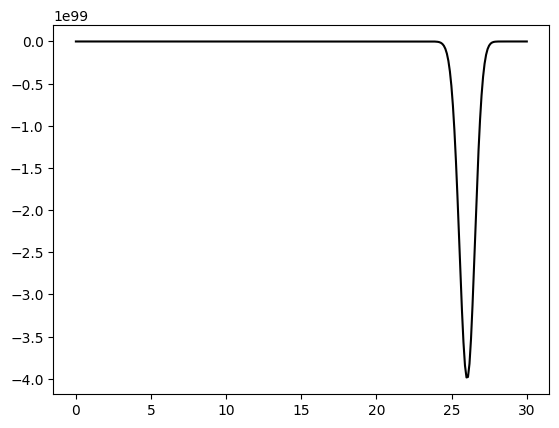

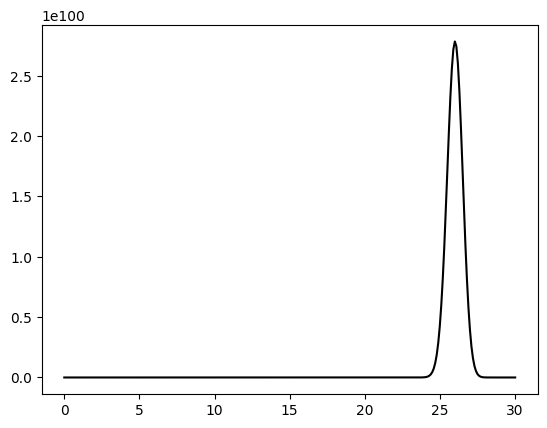

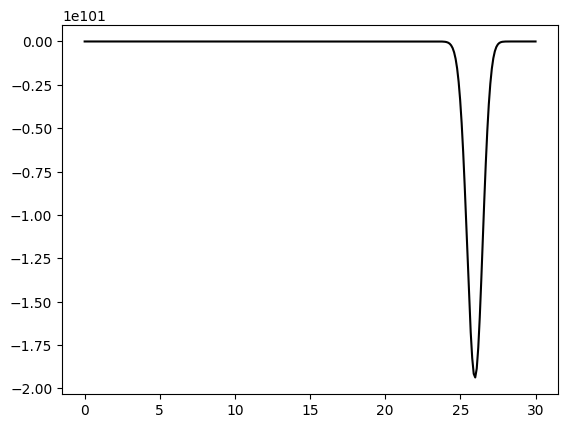

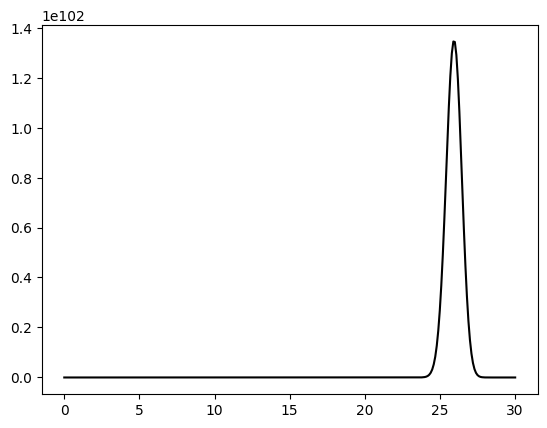

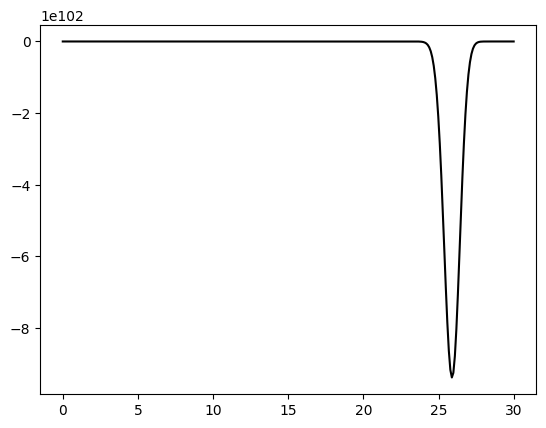

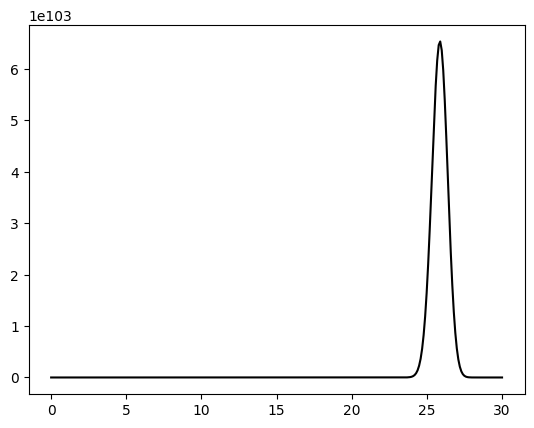

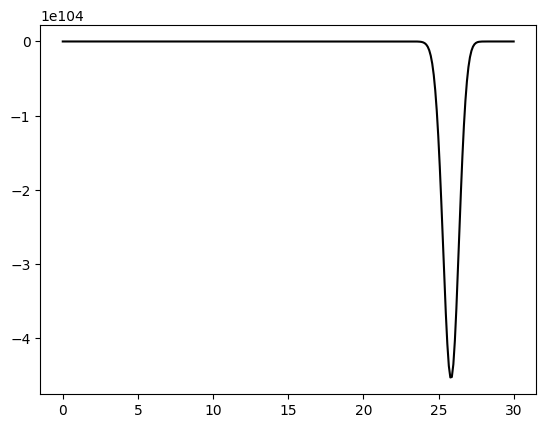

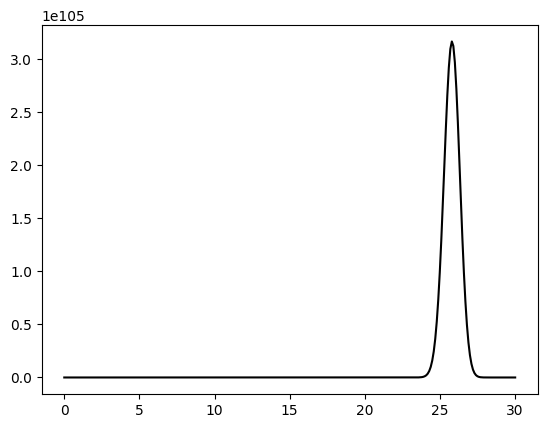

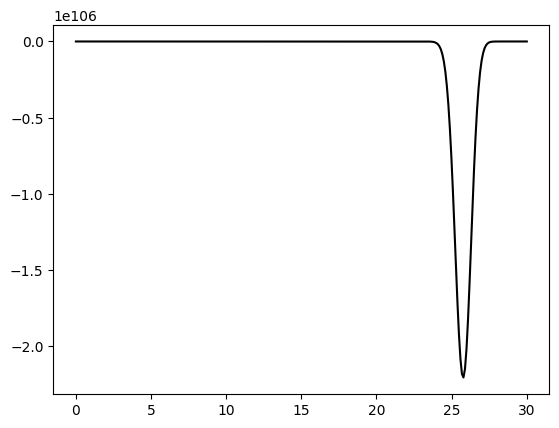

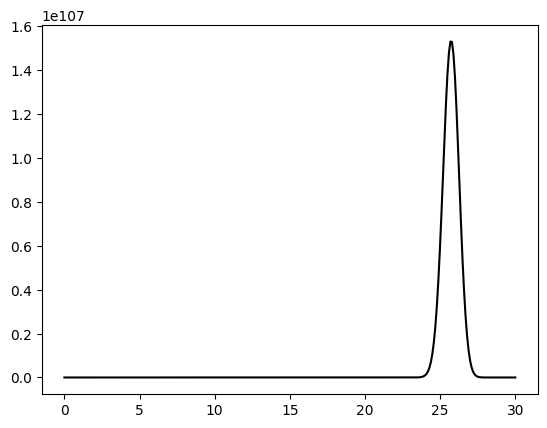

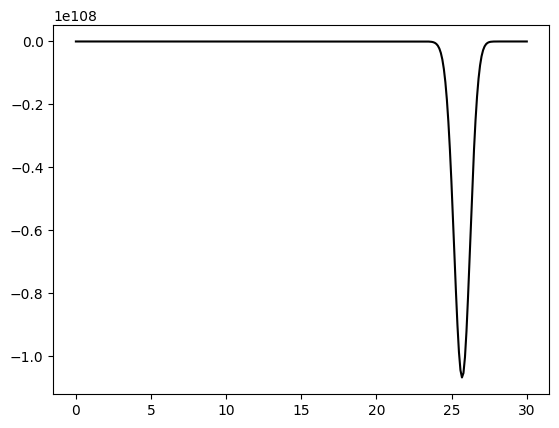

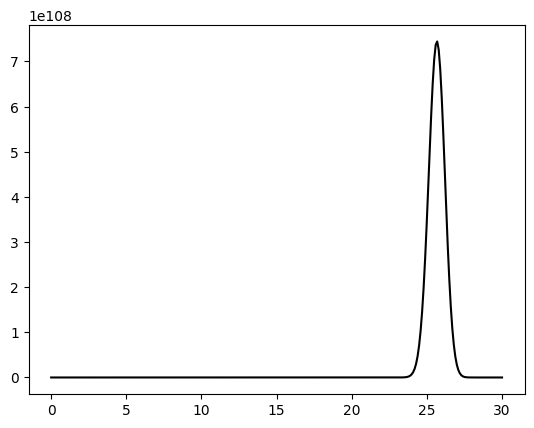

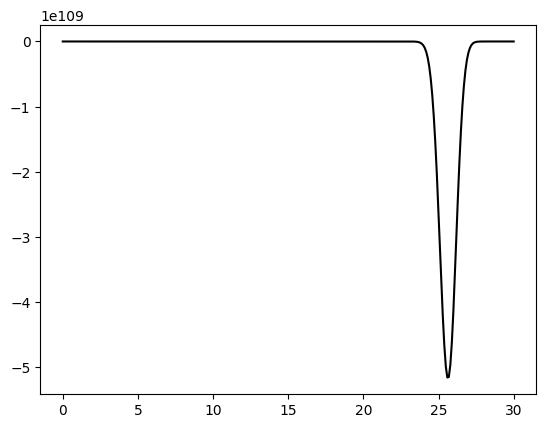

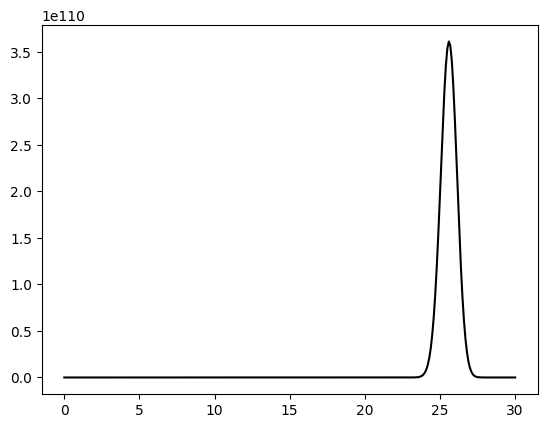

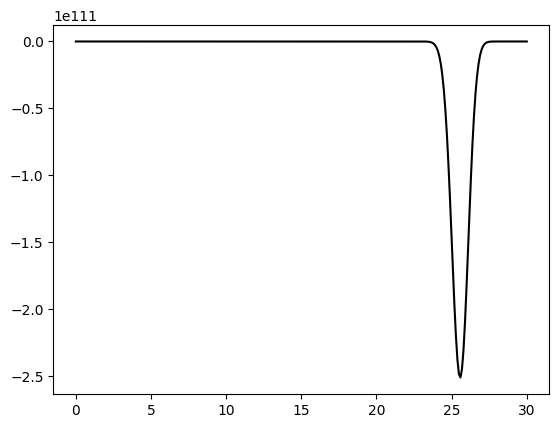

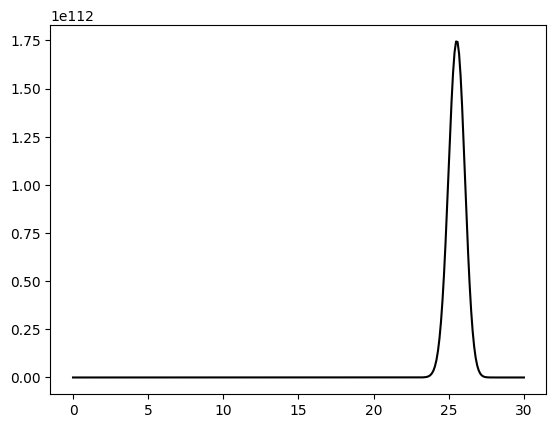

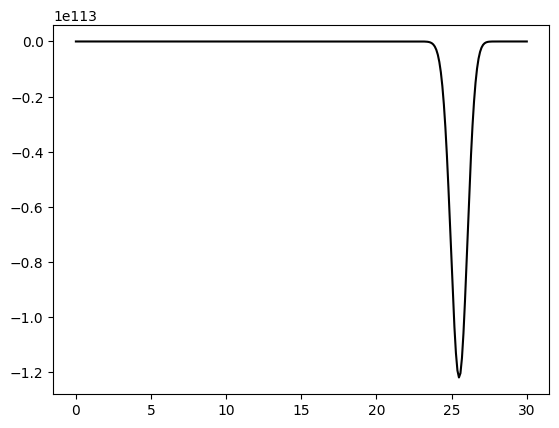

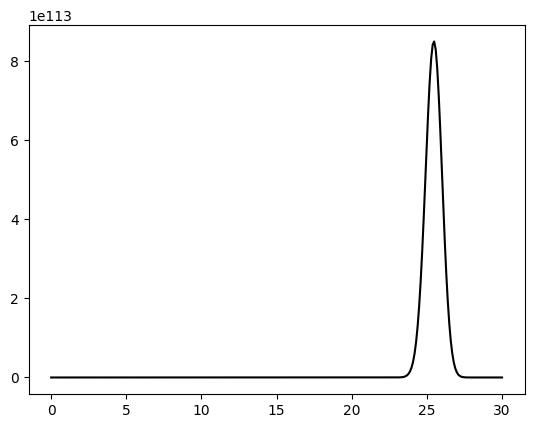

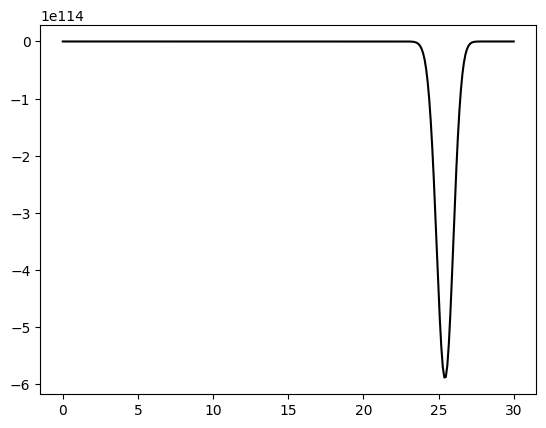

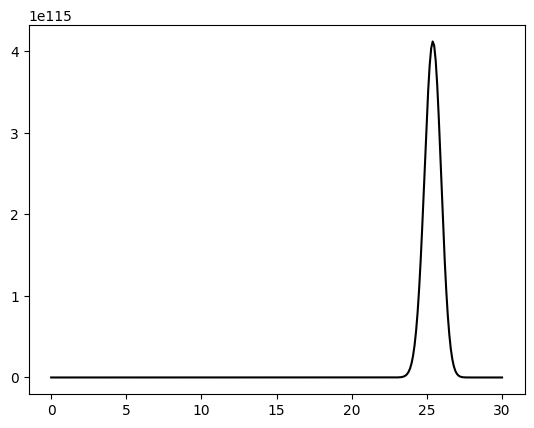

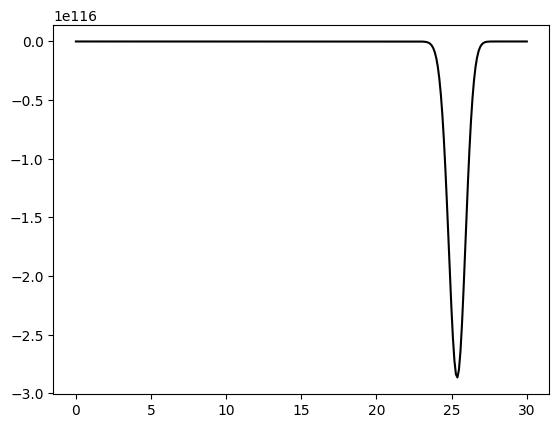

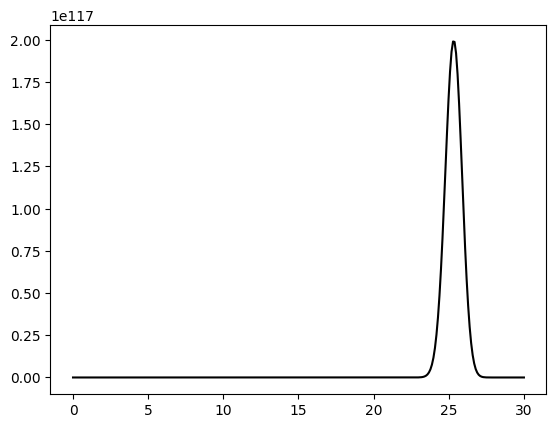

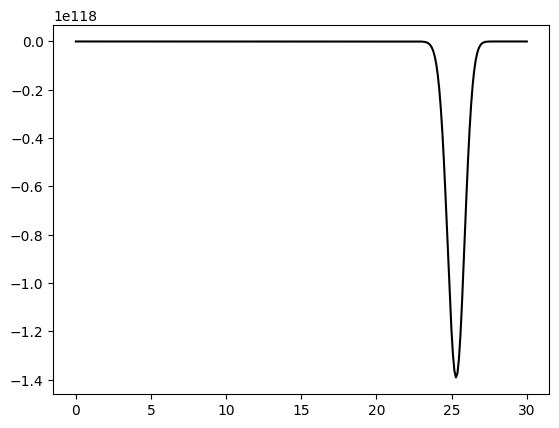

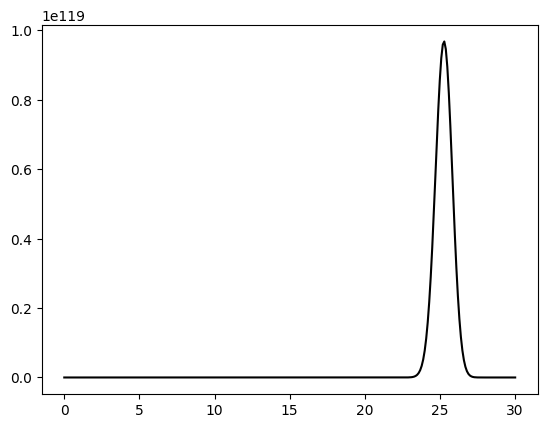

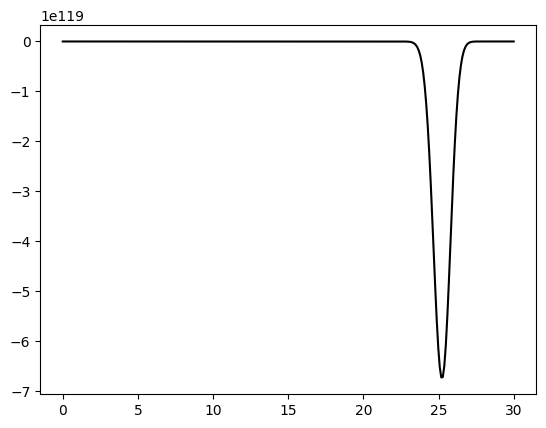

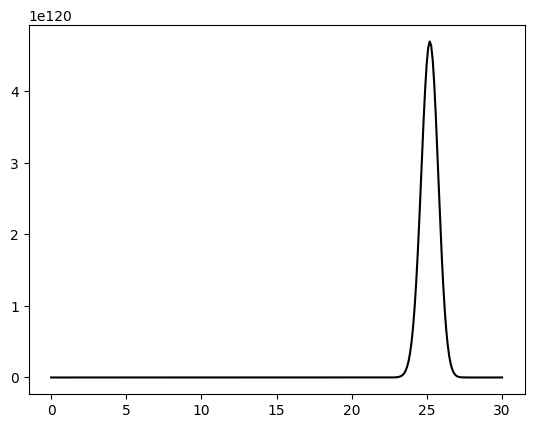

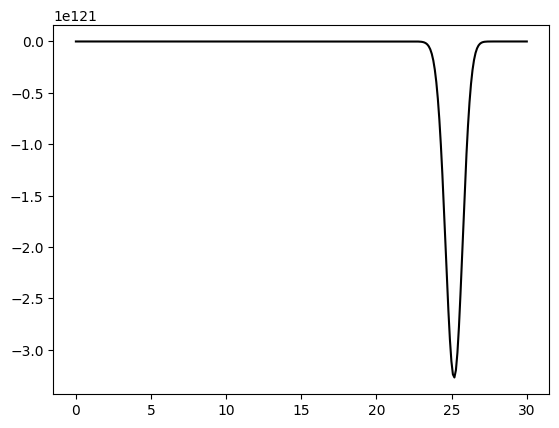

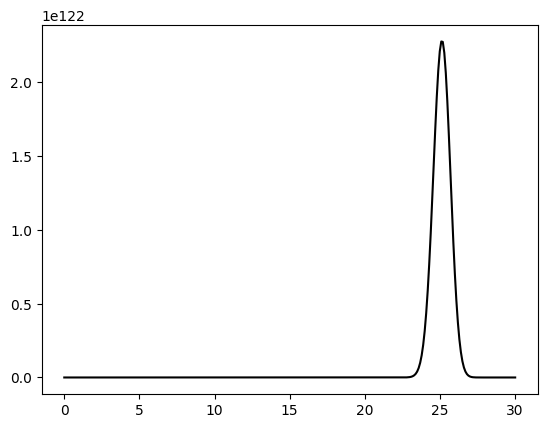

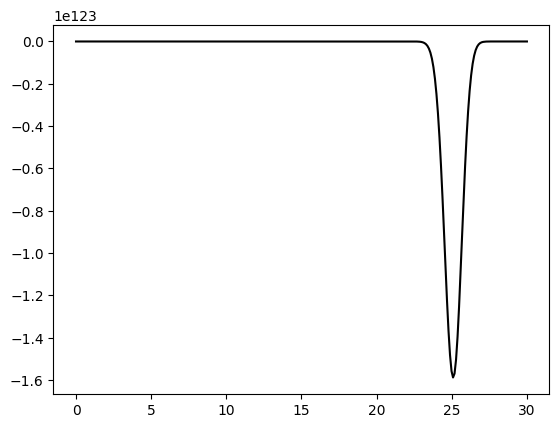

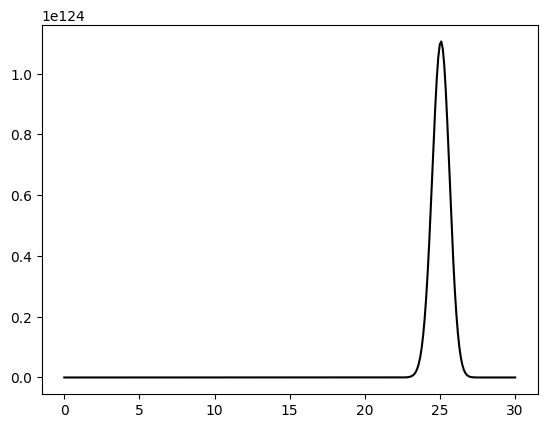

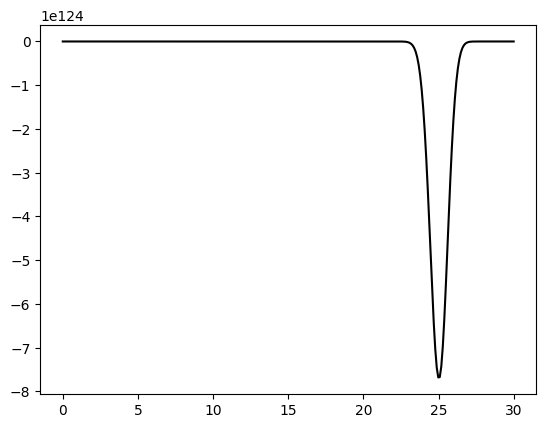

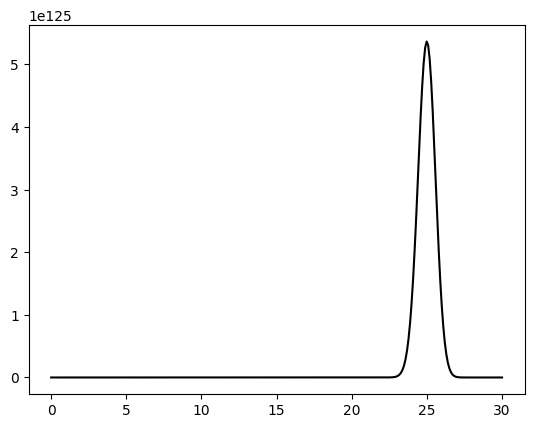

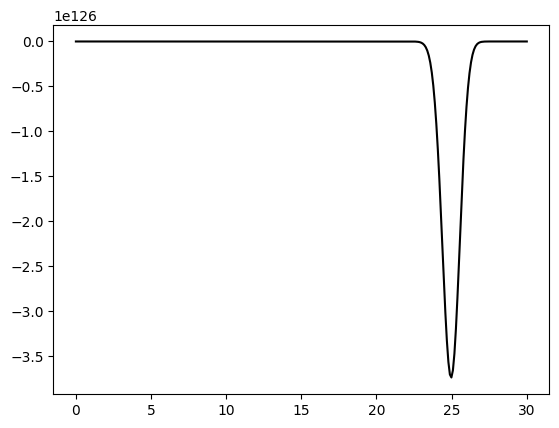

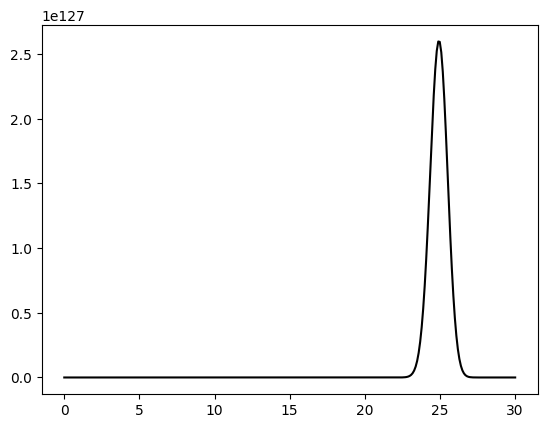

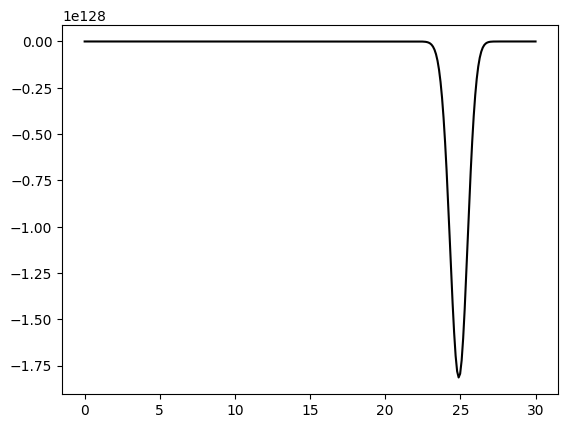

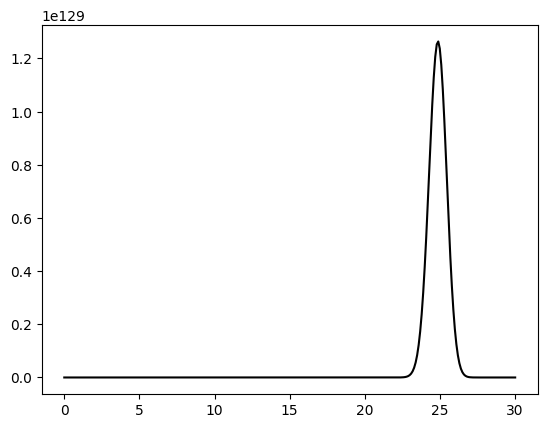

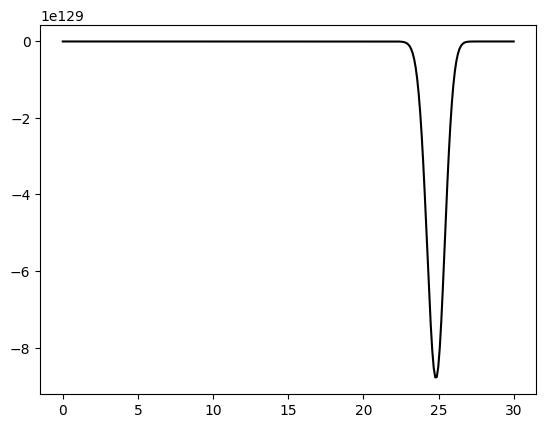

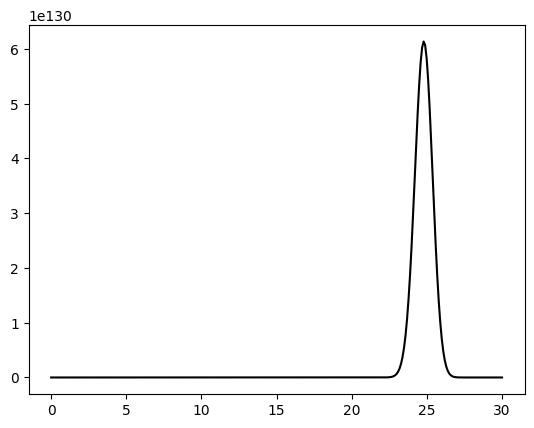

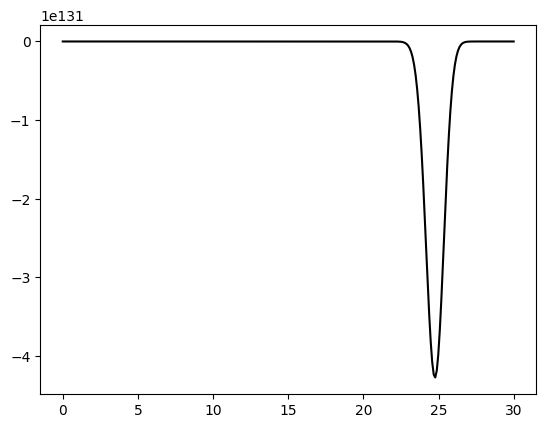

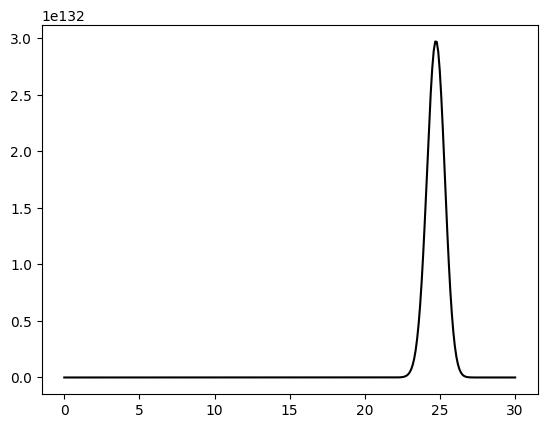

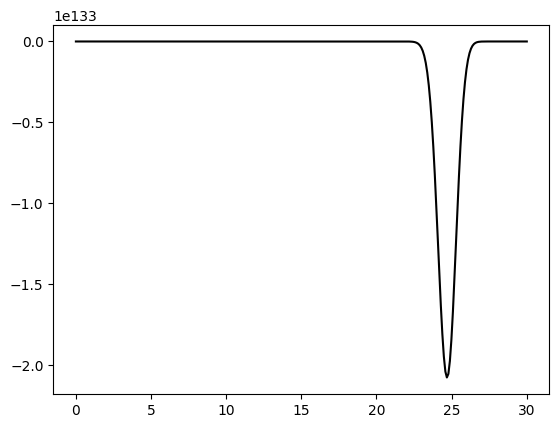

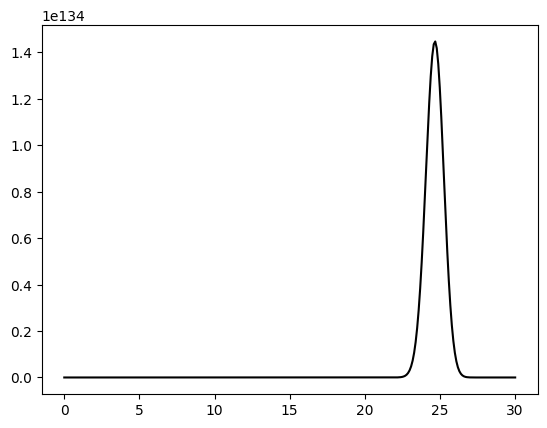

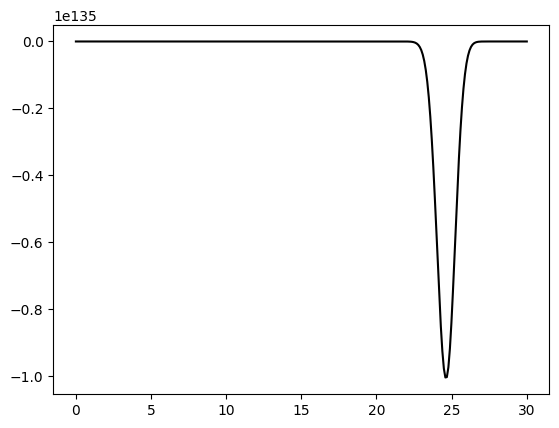

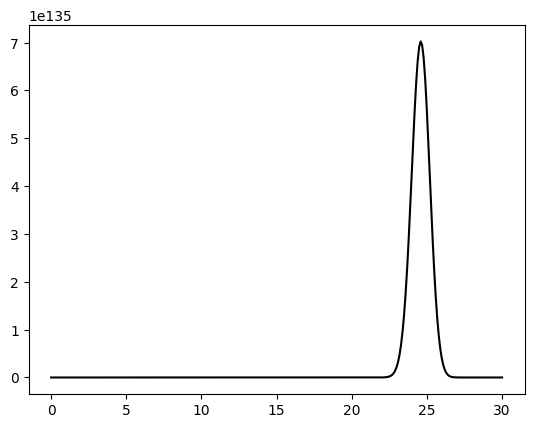

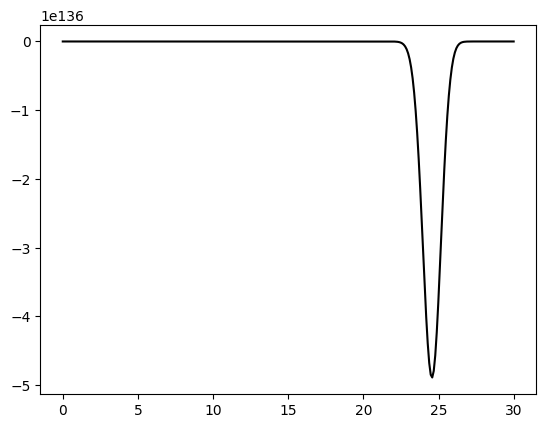

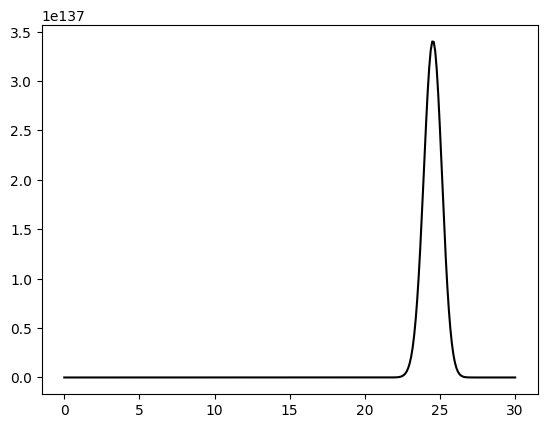

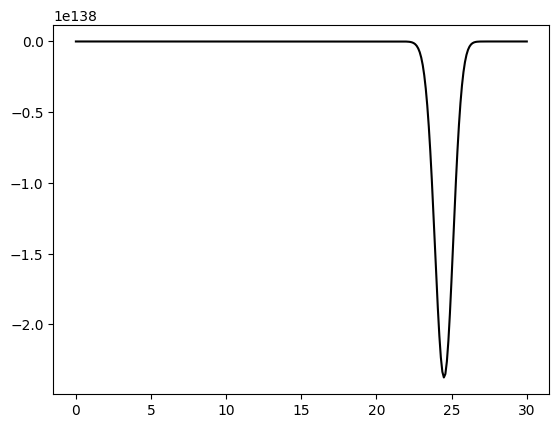

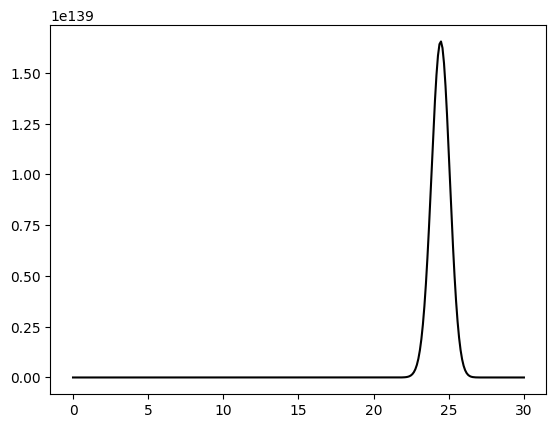

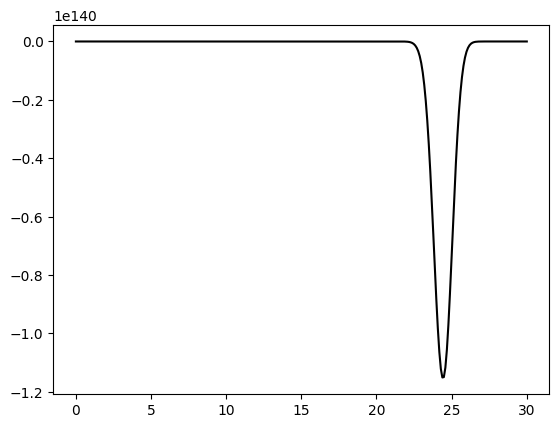

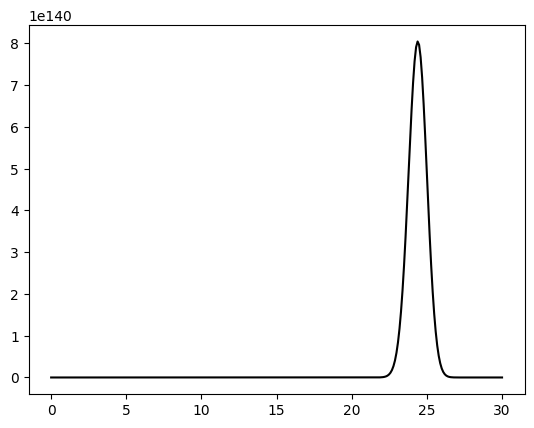

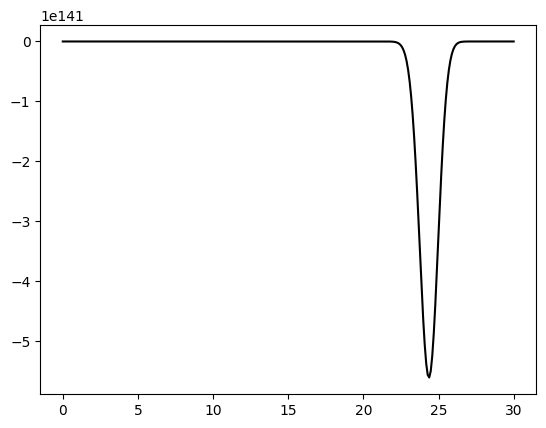

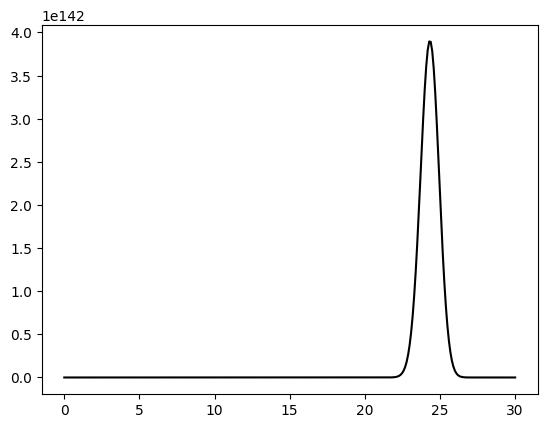

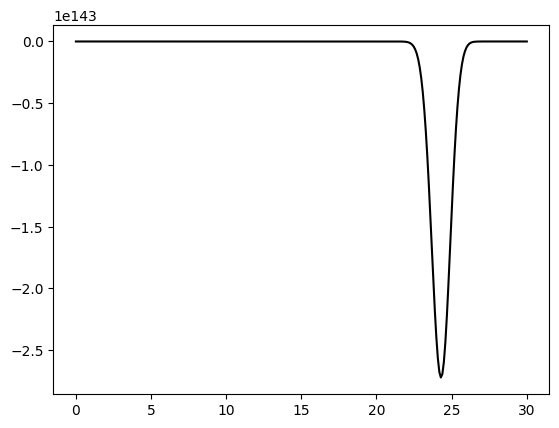

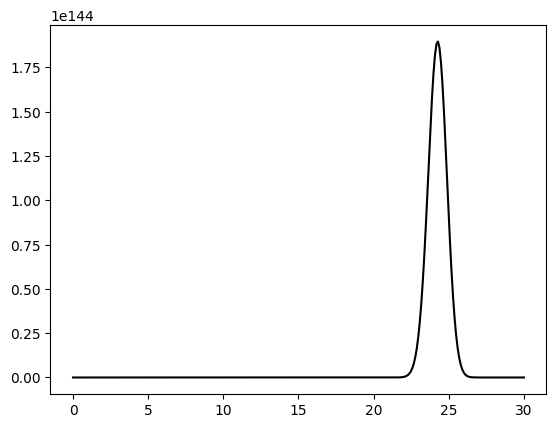

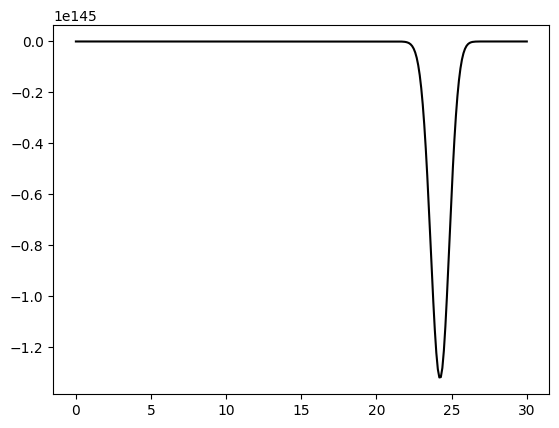

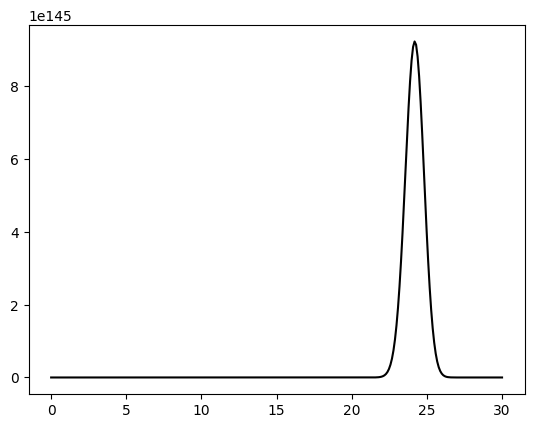

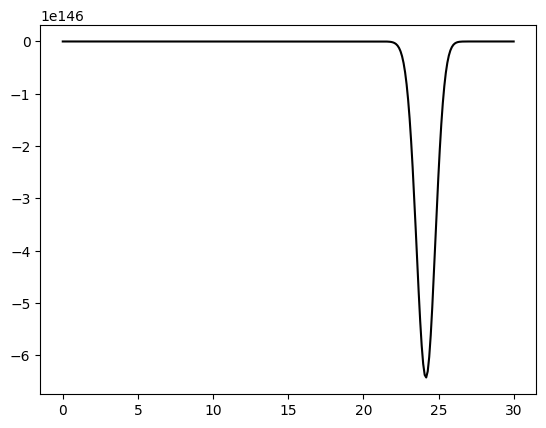

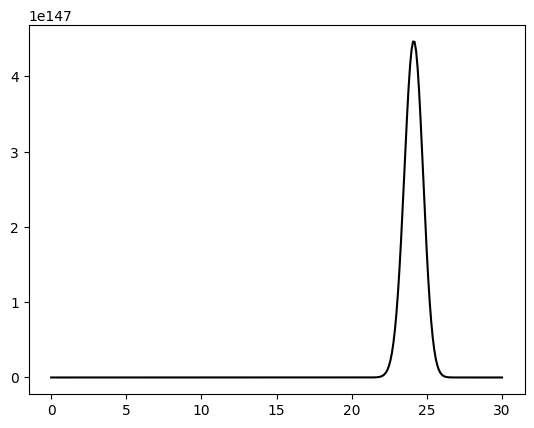

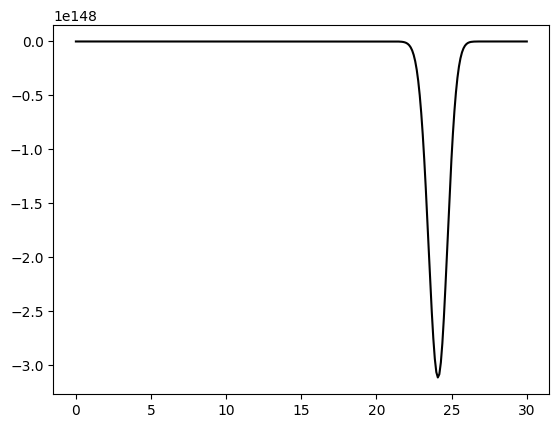

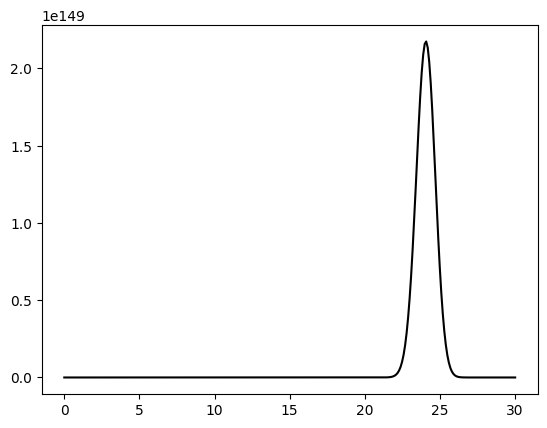

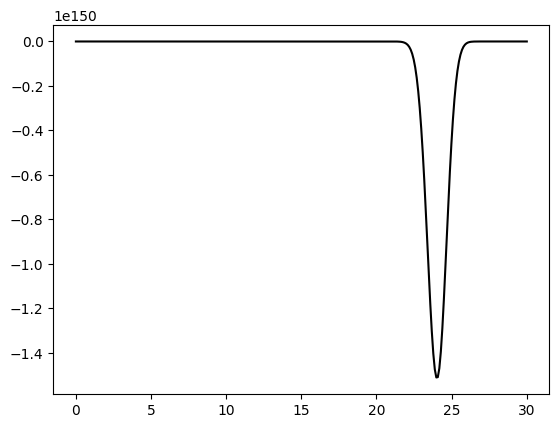

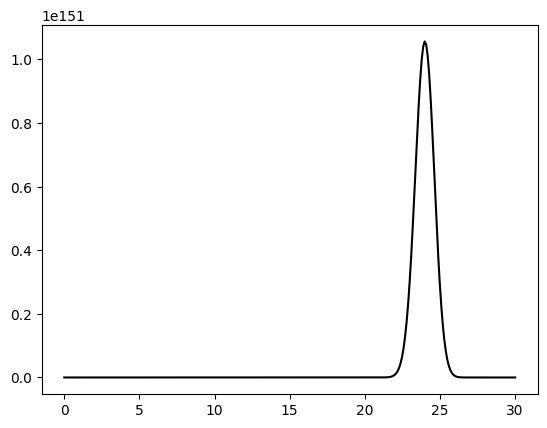

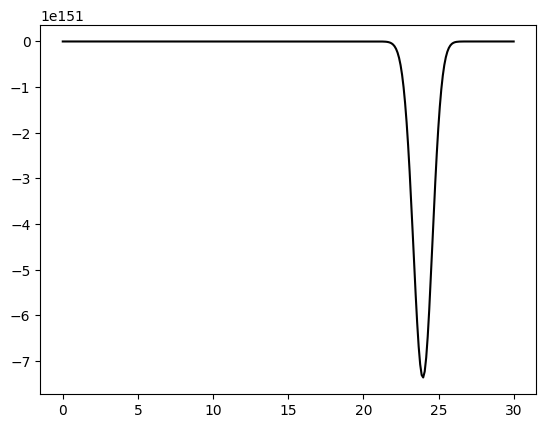

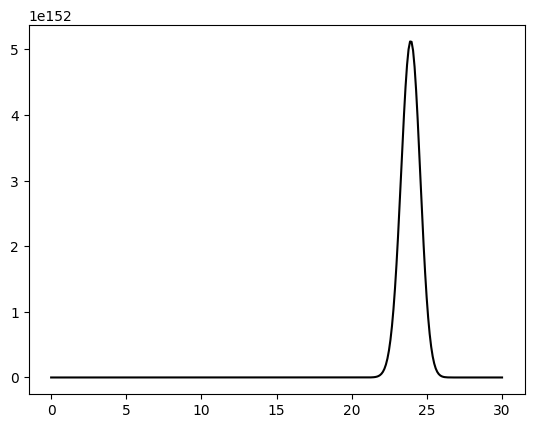

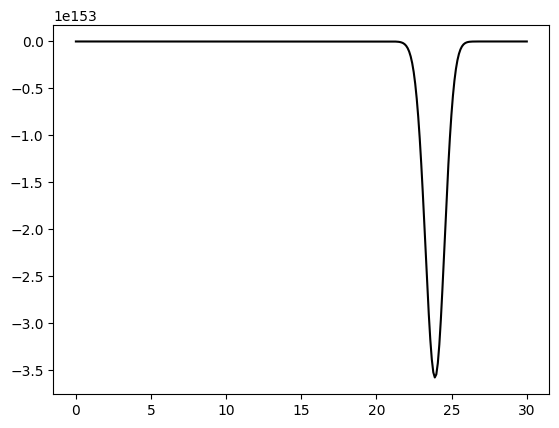

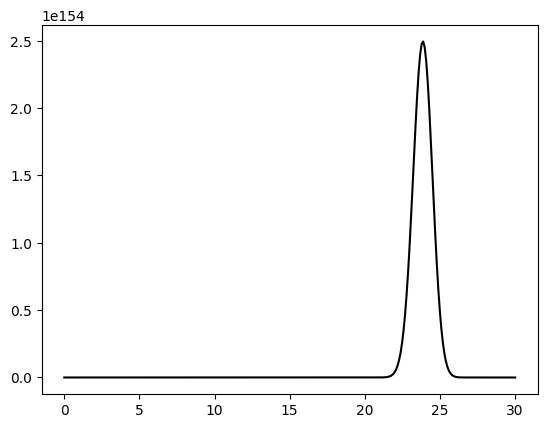

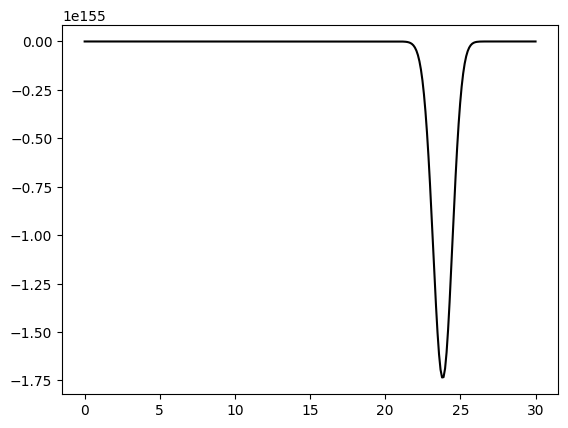

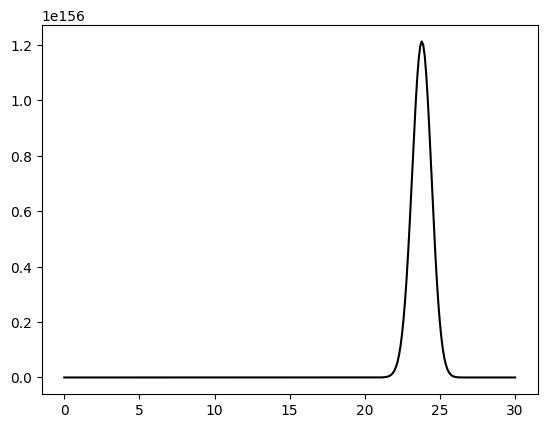

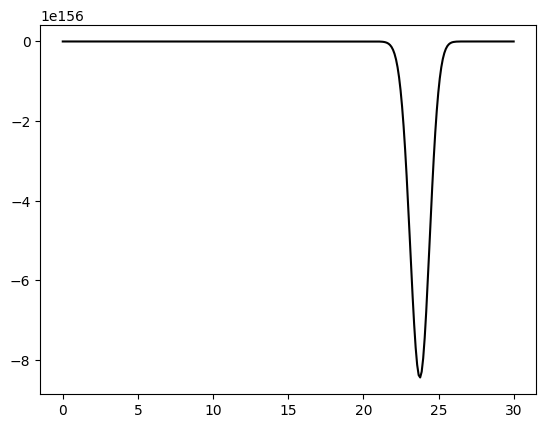

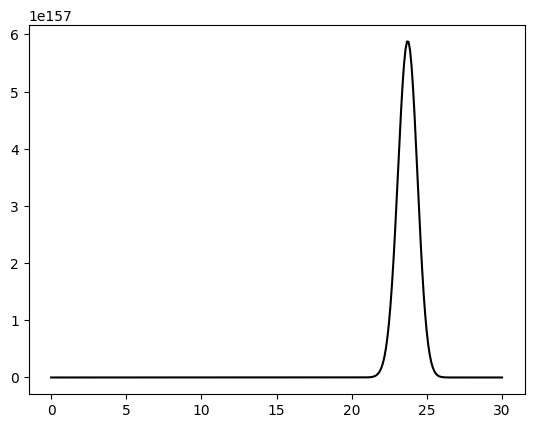

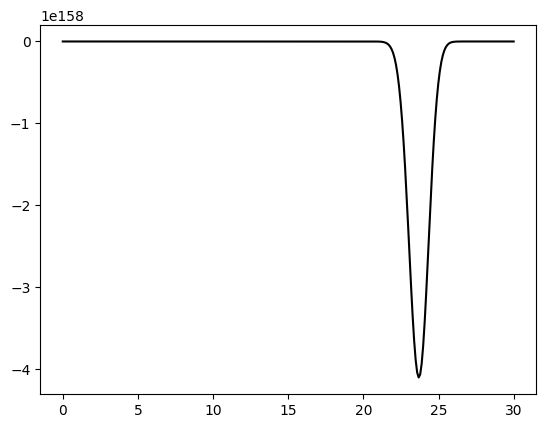

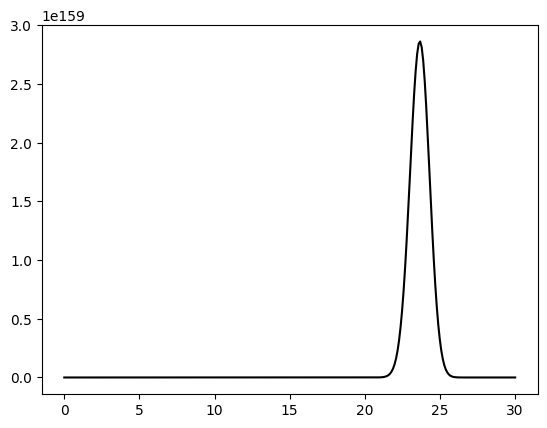

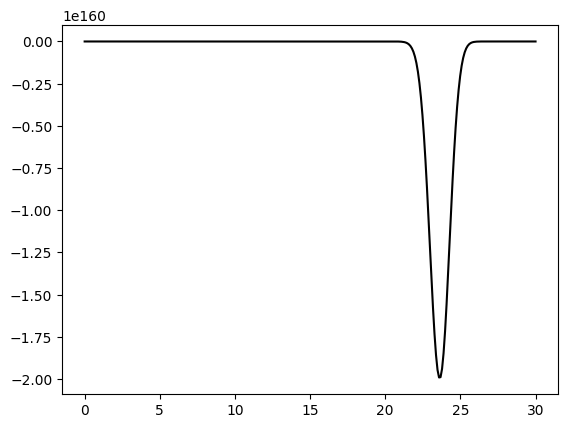

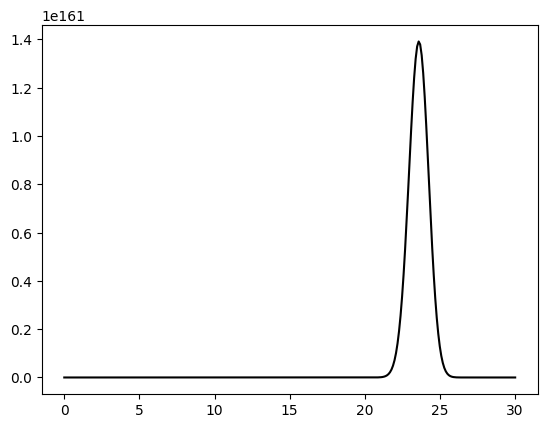

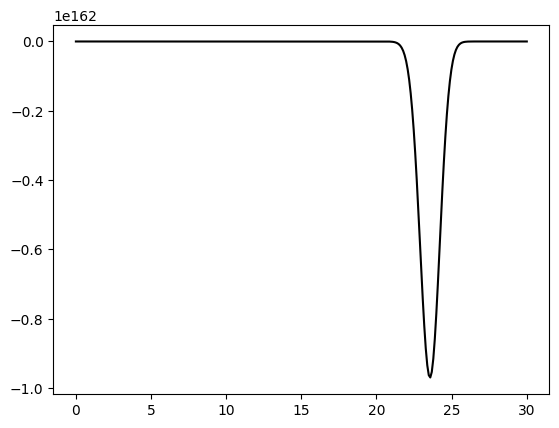

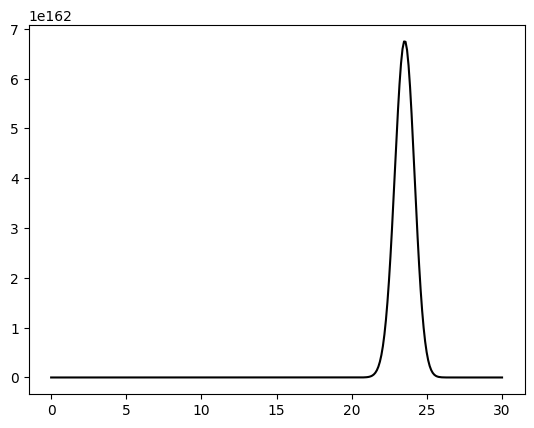

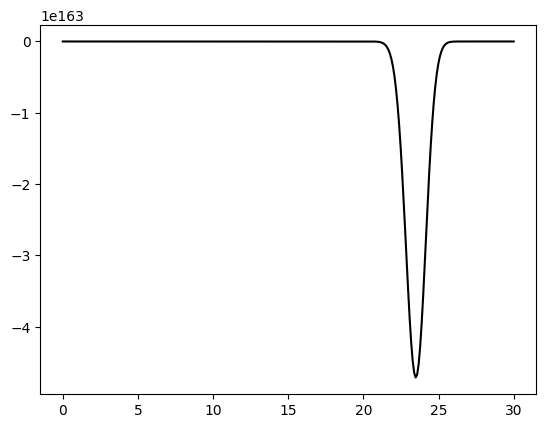

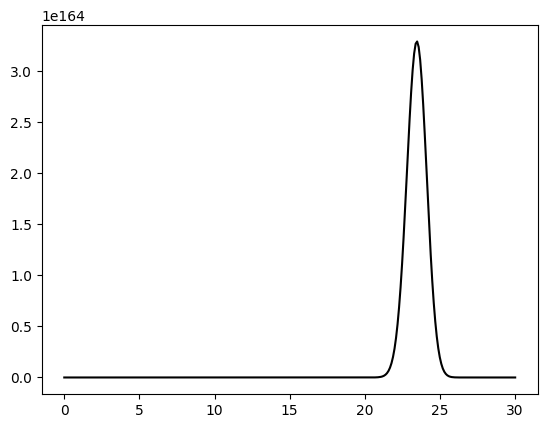

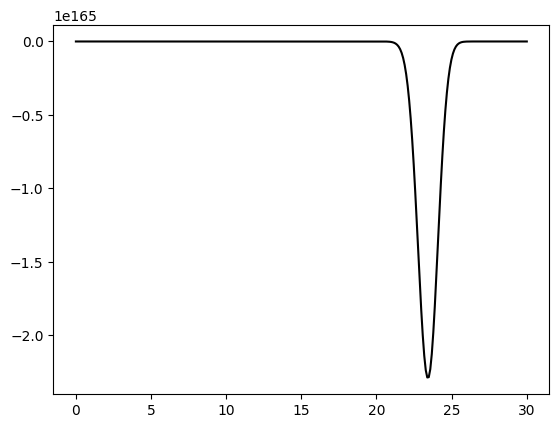

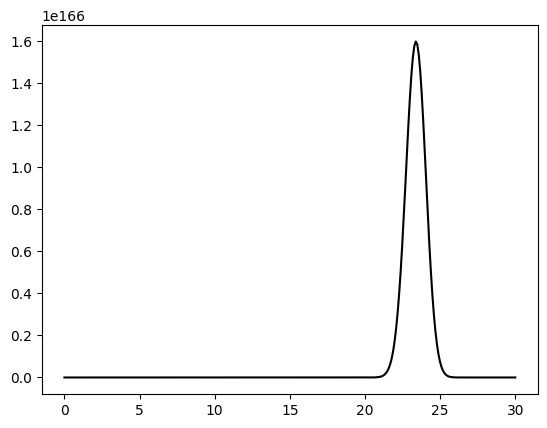

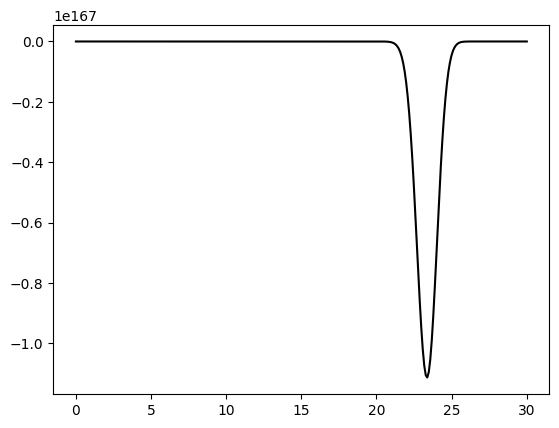

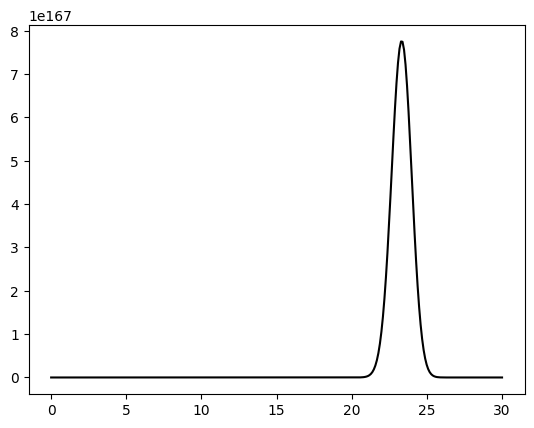

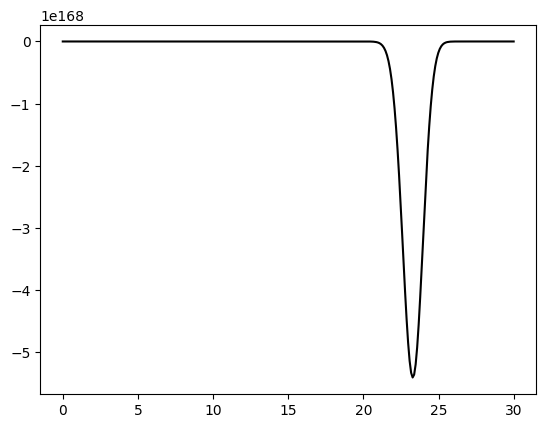

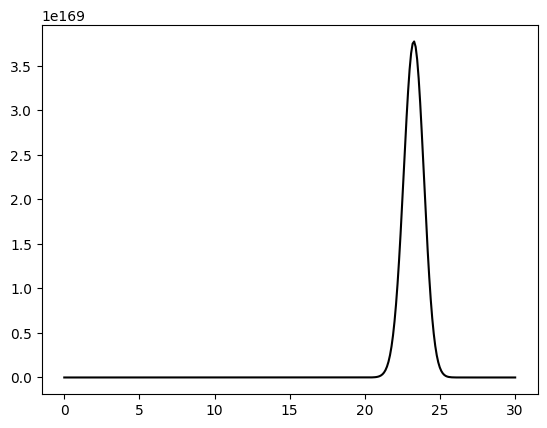

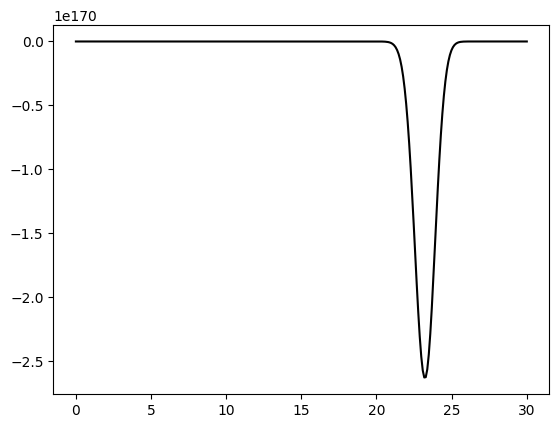

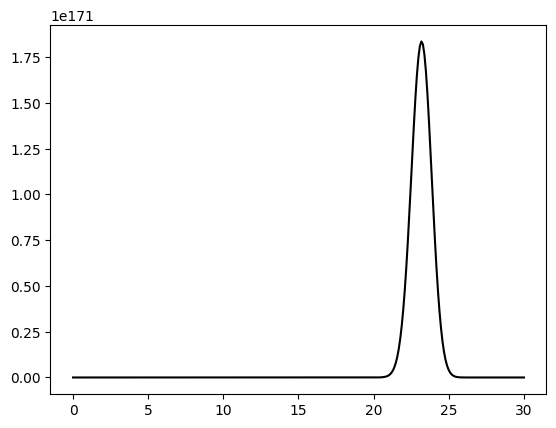

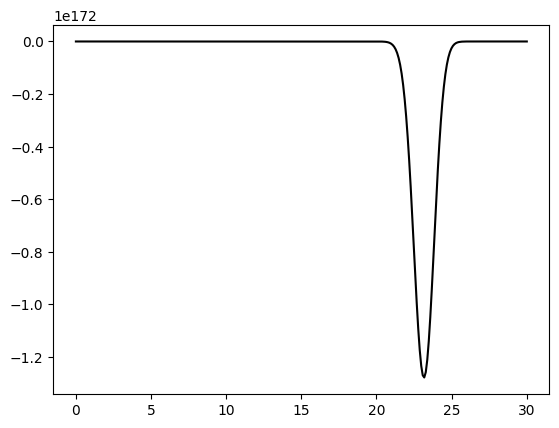

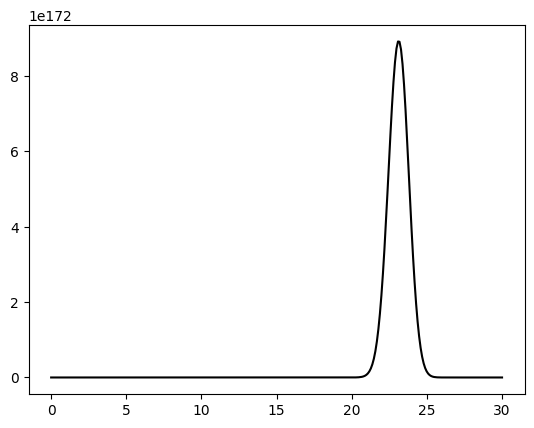

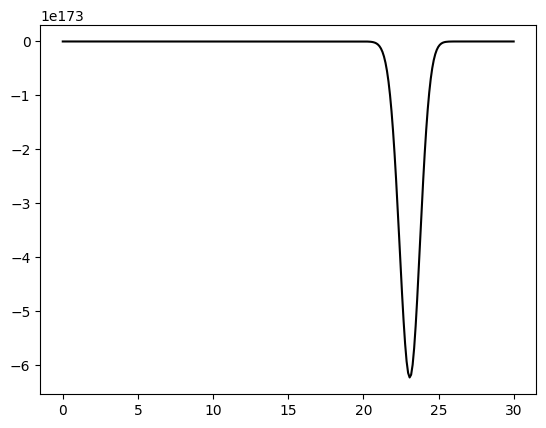

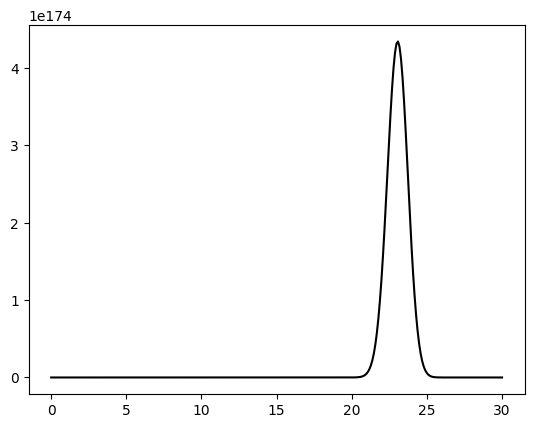

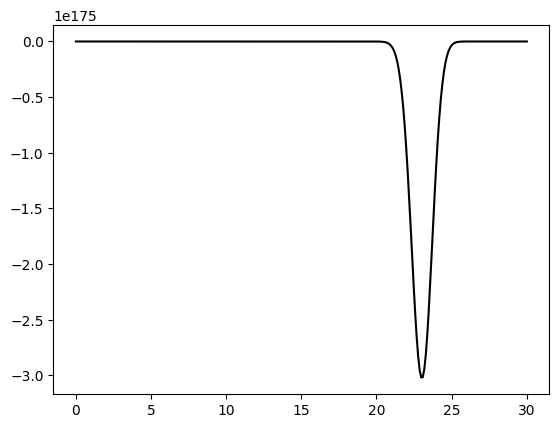

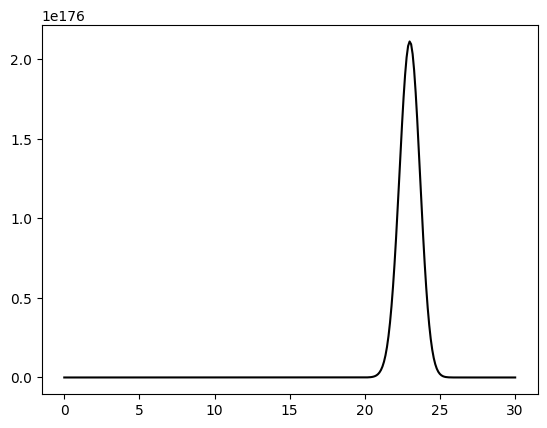

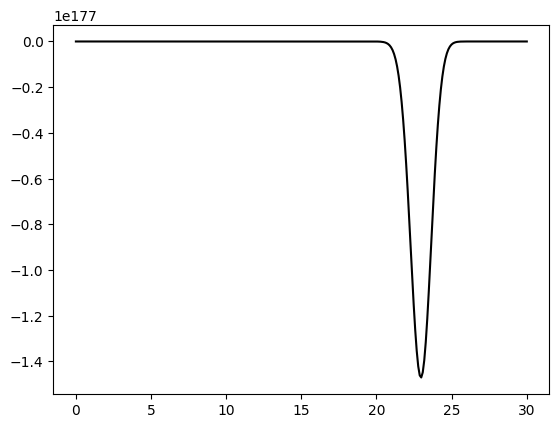

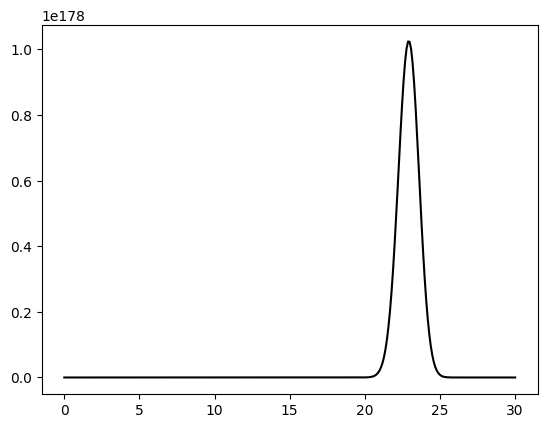

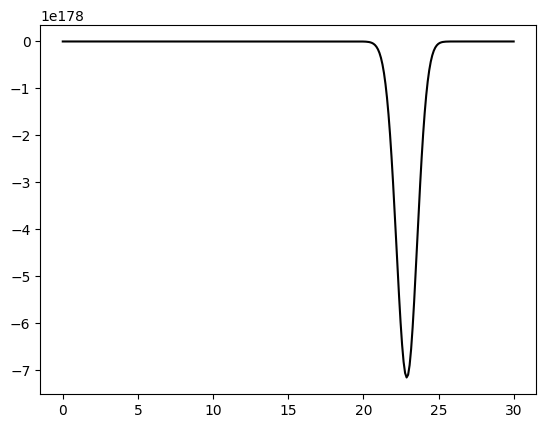

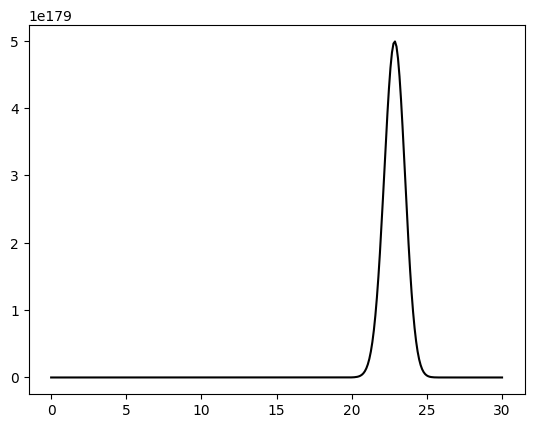

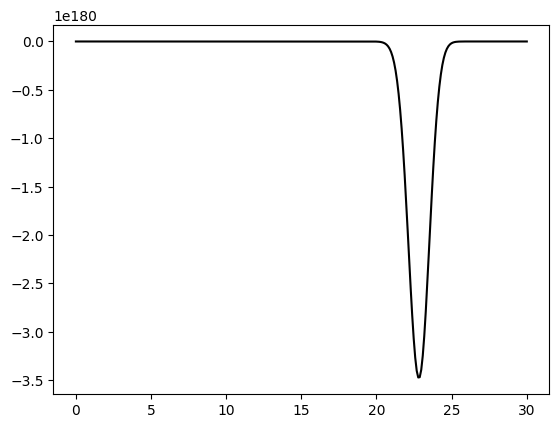

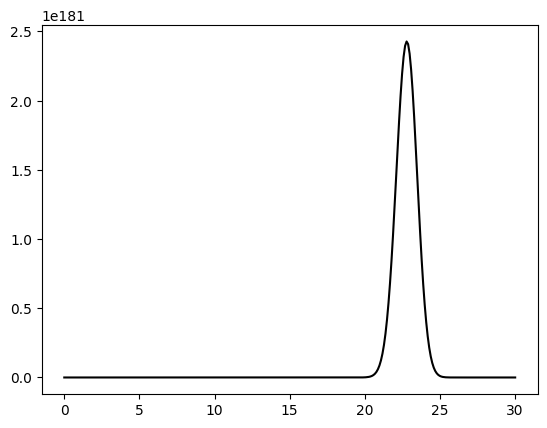

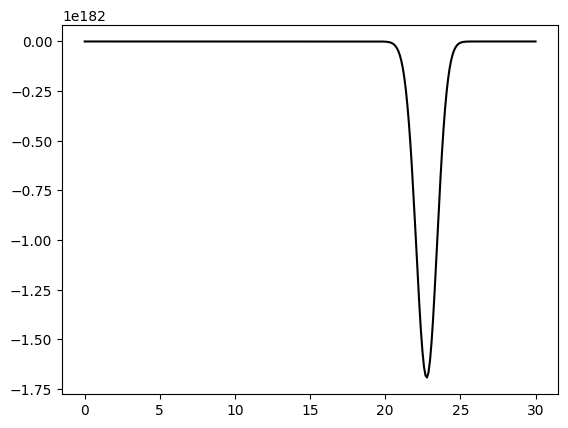

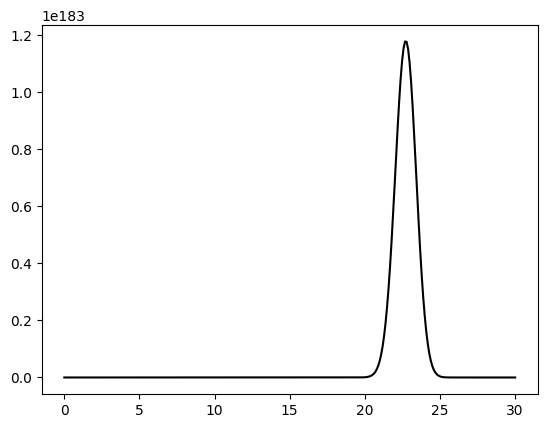

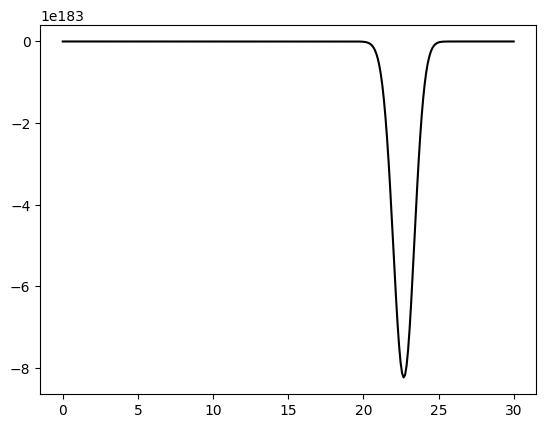

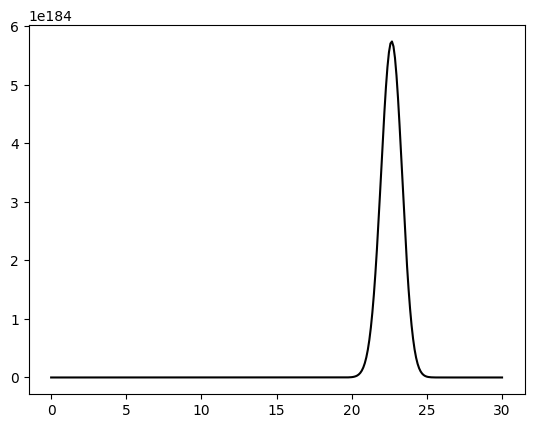

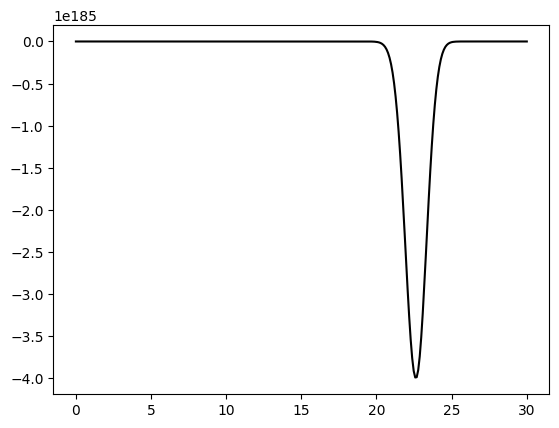

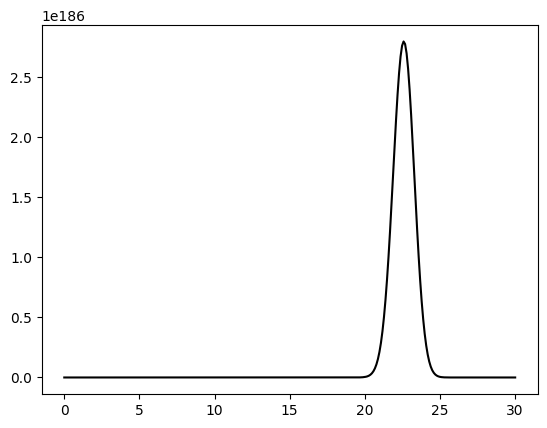

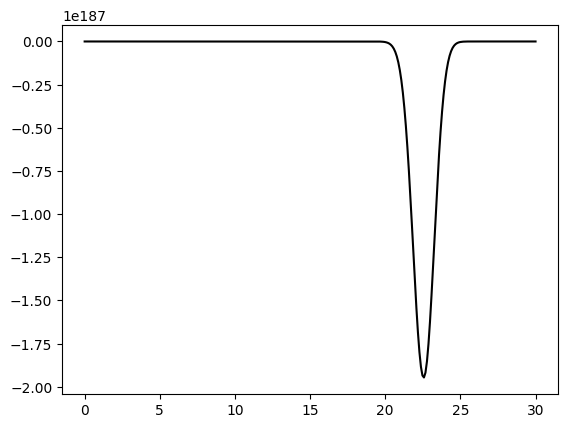

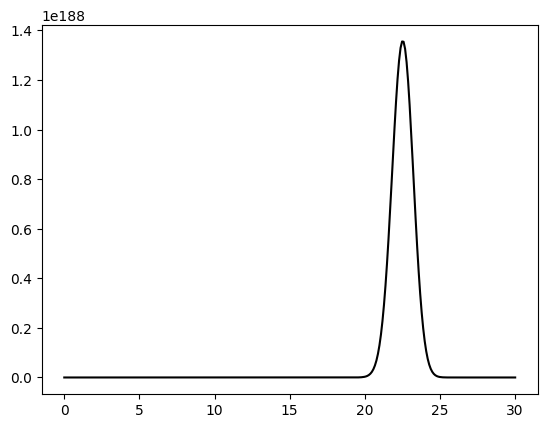

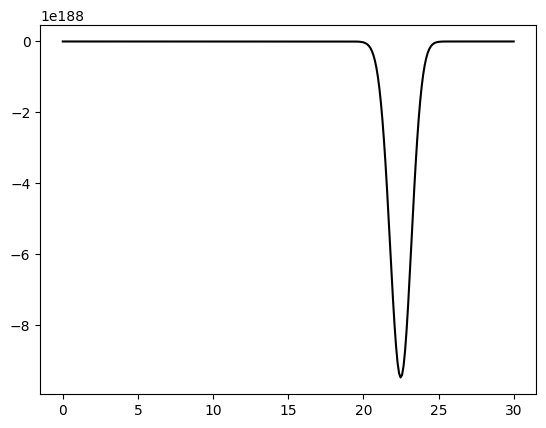

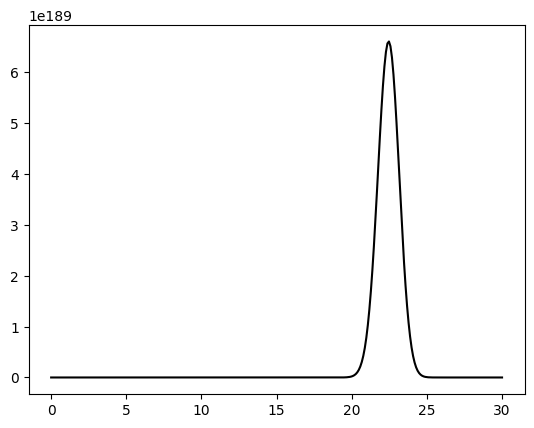

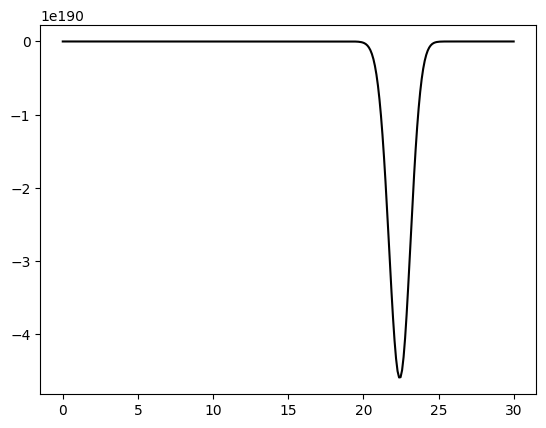

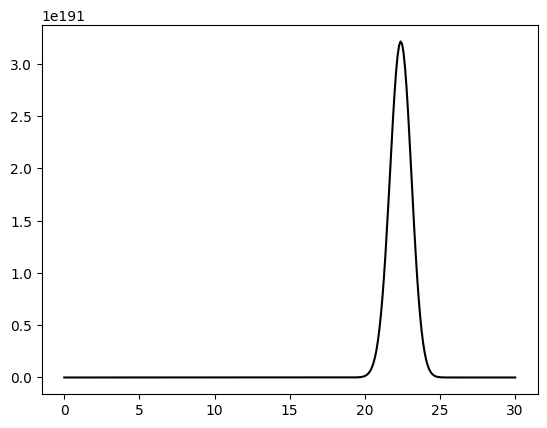

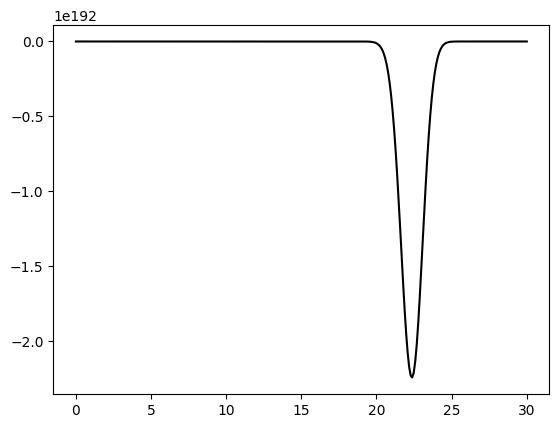

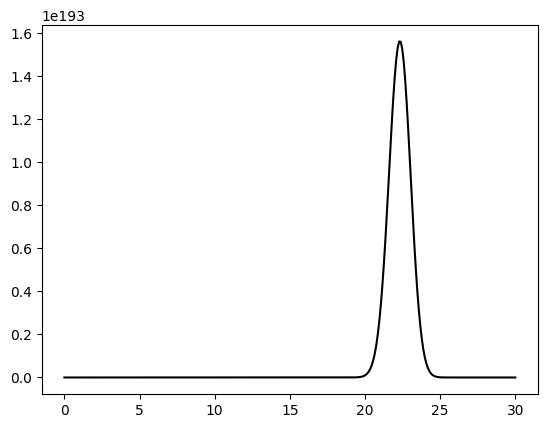

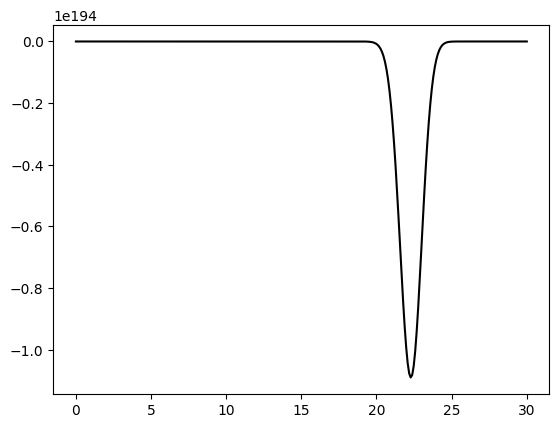

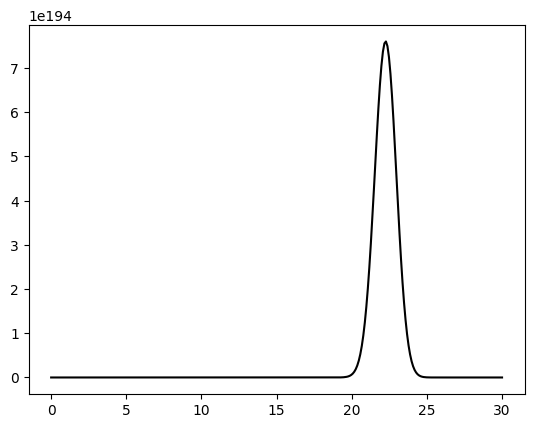

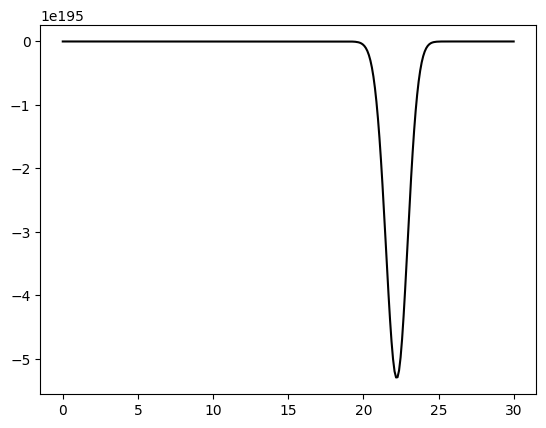

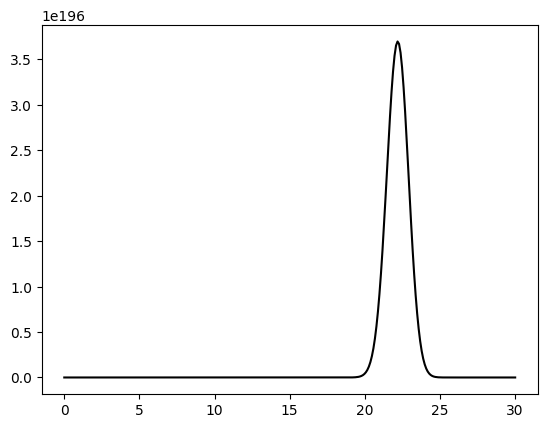

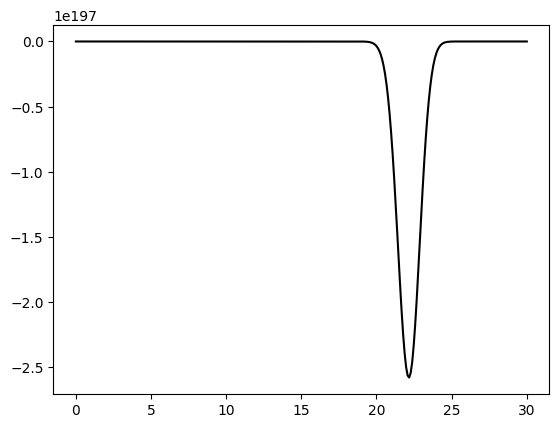

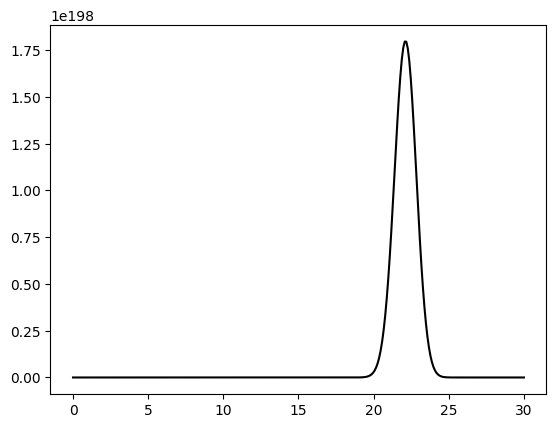

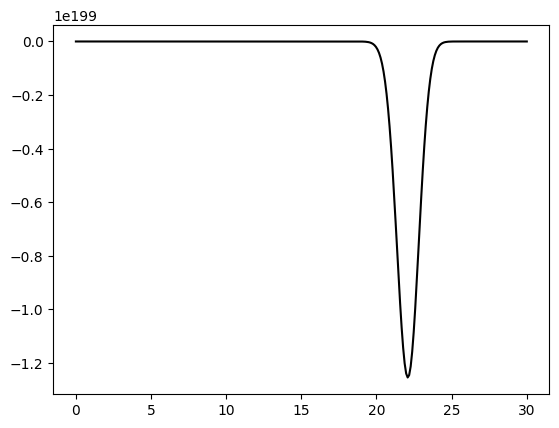

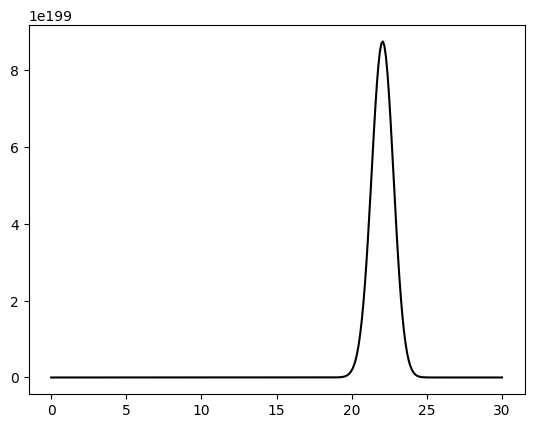

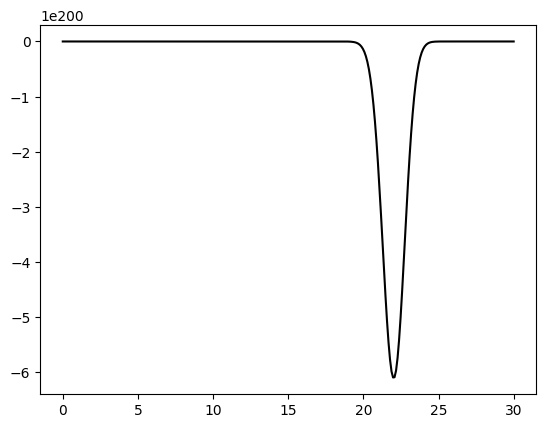

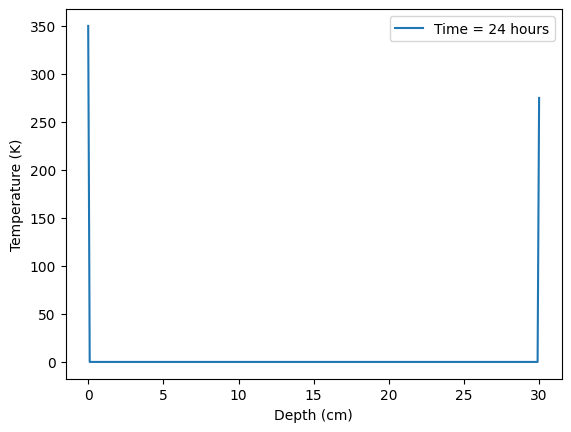

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

depth = 30  # depth of the regolith (cm)
k = 0.233  # thermal conductivity of the regolith (W / m / K)
T0 = 300  # temperature at the surface (K)
Tm = 275  # temperature at the bottom of the regolith (K)
time= 24 # time in hours

dx = 0.1  # spatial grid size (cm)
x_vec = np.linspace(0, depth, int(depth/dt))  # spatial grid

dt = 0.1  # time step size (hours)
Time = np.linspace(0, time, int(time/dt))  # time grid

Temperature = np.zeros((len(Time), len(x_vec)))  # temperature grid

# Boundary conditions
Temperature[:, 0] = 350
Temperature[:, -1] = 275

for t in range(1, len(Time)-1):
    for x in range(1, len(x_vec) - 1):
        Temperature[t+1, x] = k*(dt/dx**2)*(Temperature[t, x+1] - 2*Temperature[t, x+1] -2*Temperature[t,x])
    
    pyplot.plot(x_vec,Temperature[t],"black")
    pyplot.pause(0.001)
    pyplot.cla()

pyplot.plot(x_vec, Temperature[0], label=f'Time = {time} hours')
pyplot.xlabel('Depth (cm)')
pyplot.ylabel('Temperature (K)')
pyplot.legend()
pyplot.show()









